<a href="https://colab.research.google.com/github/Amri1003/Machine_Learning_Projects/blob/main/LassoRegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Program to execute renewable energy data analysis and prediction using linear regression
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('imported')

imported


In [2]:
# import the dataset
data=pd.read_csv('/content/renewable-share-energy.csv')
data.head()

Entity Code  Year  Renewables (% equivalent primary energy)
0  Africa  NaN  1965                                  5.747495
1  Africa  NaN  1966                                  6.122062
2  Africa  NaN  1967                                  6.325731
3  Africa  NaN  1968                                  7.005293
4  Africa  NaN  1969                                  7.956088

In [4]:
# Cheking for null values if any
print('Total null values:', data.isnull().sum())

Total null values: Entity                                         0
Code                                        1311
Year                                           0
Renewables (% equivalent primary energy)       0
dtype: int64


In [5]:
# Drop the column code
data.drop('Code', axis=1, inplace=True)
data.head()

Entity  Year  Renewables (% equivalent primary energy)
0  Africa  1965                                  5.747495
1  Africa  1966                                  6.122062
2  Africa  1967                                  6.325731
3  Africa  1968                                  7.005293
4  Africa  1969                                  7.956088

In [9]:
# Lets find out how many unique entities we have
print('Unique entities(Countries):', data['Entity'].nunique())

Unique entities(Countries): 104


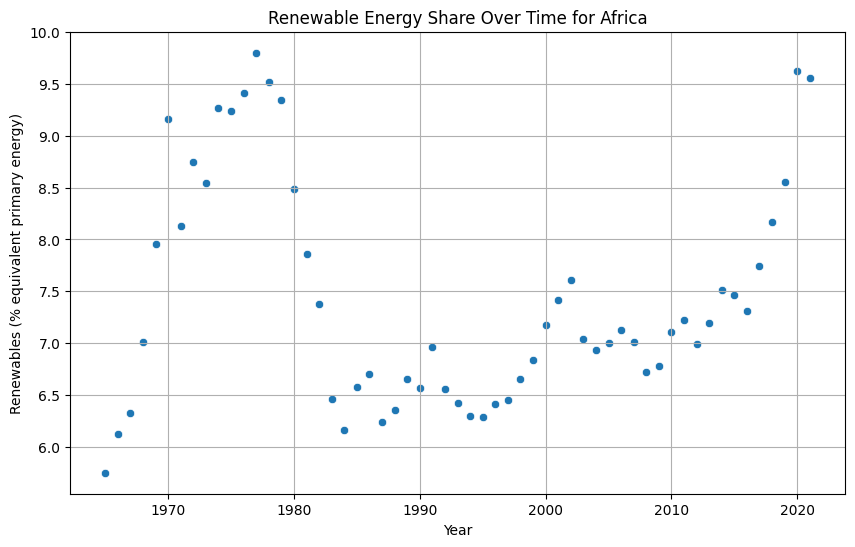

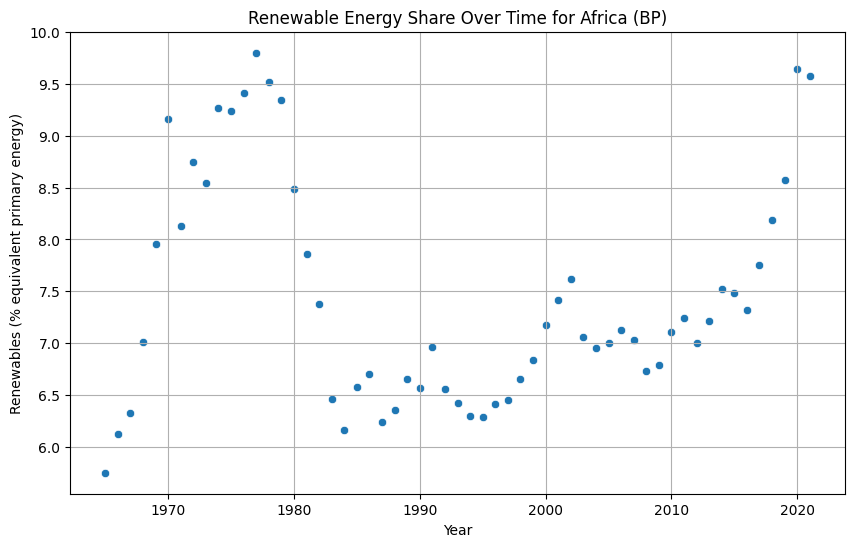

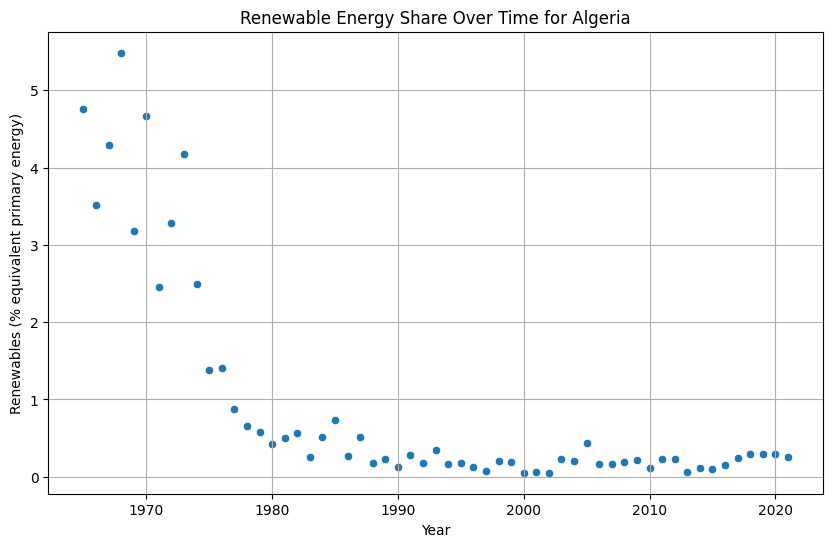

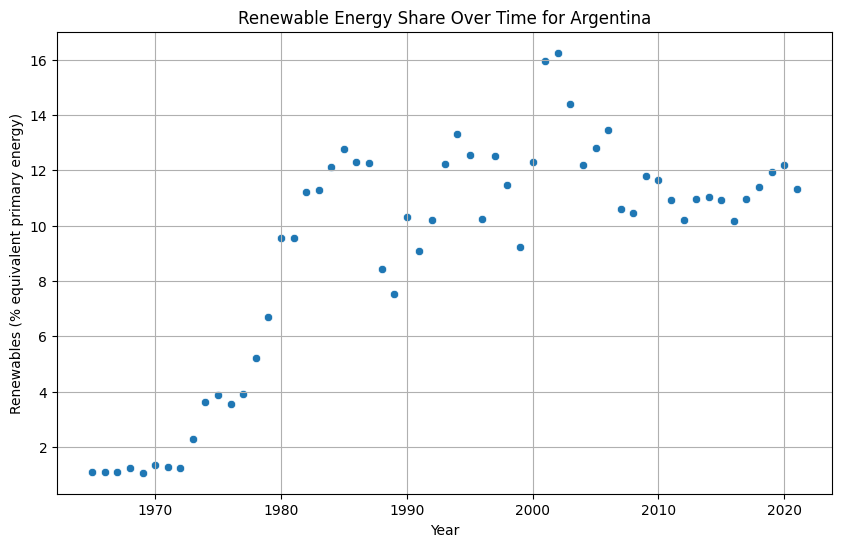

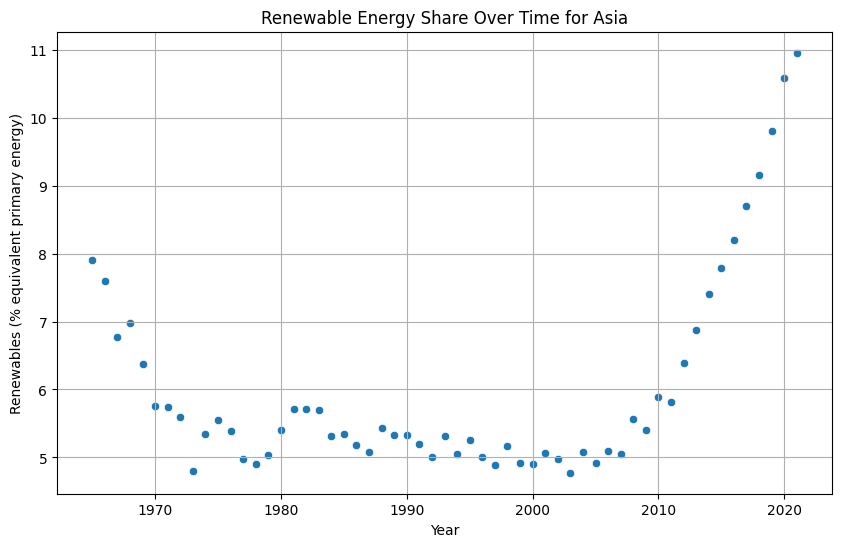

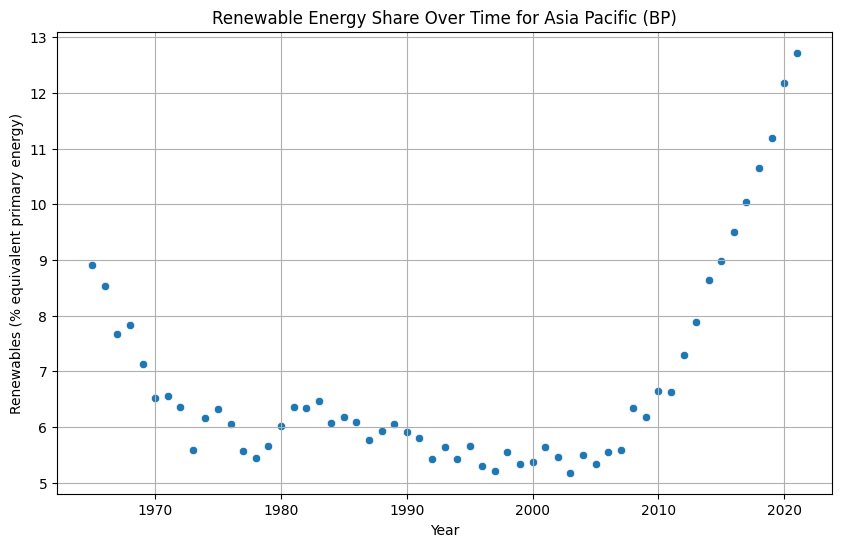

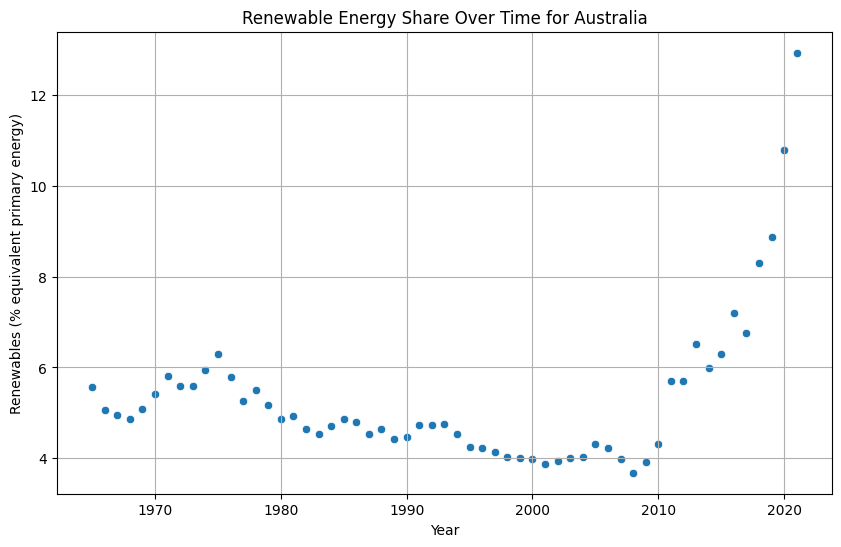

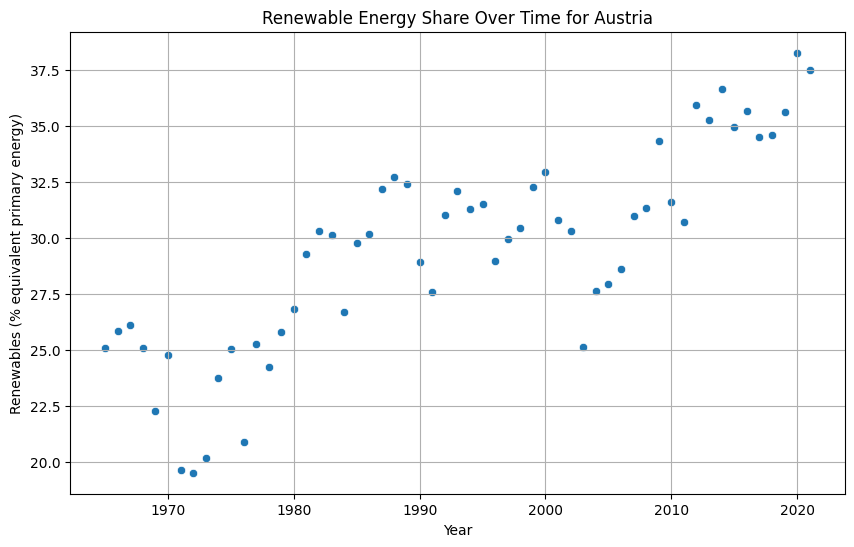

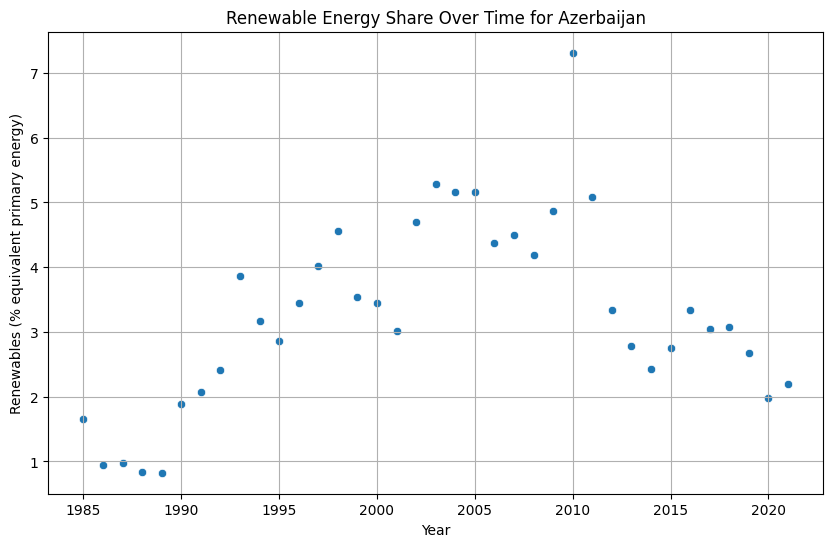

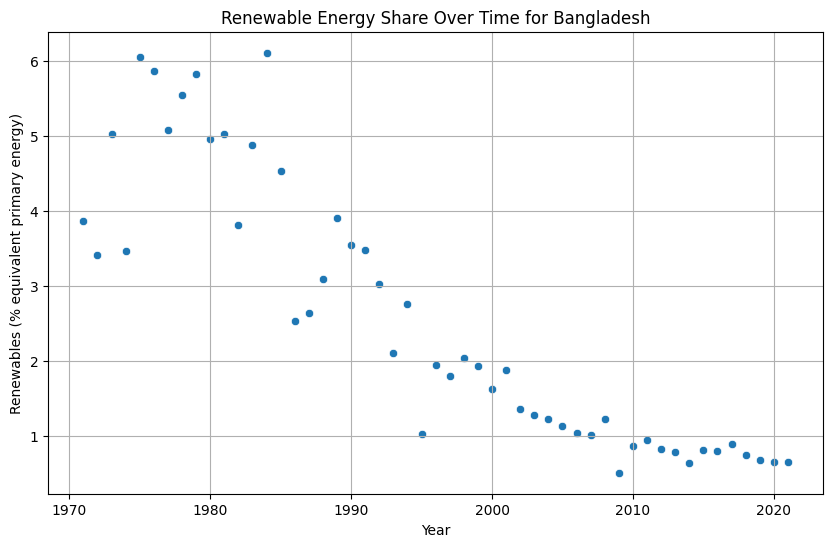

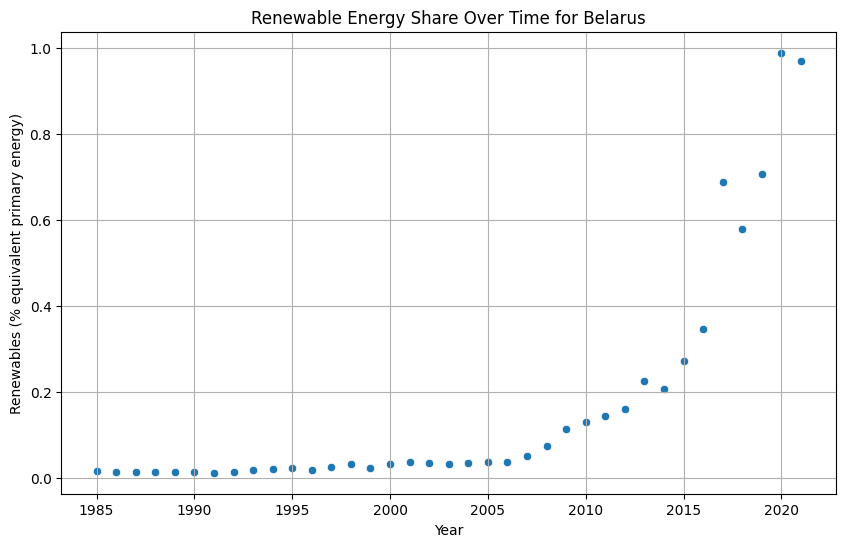

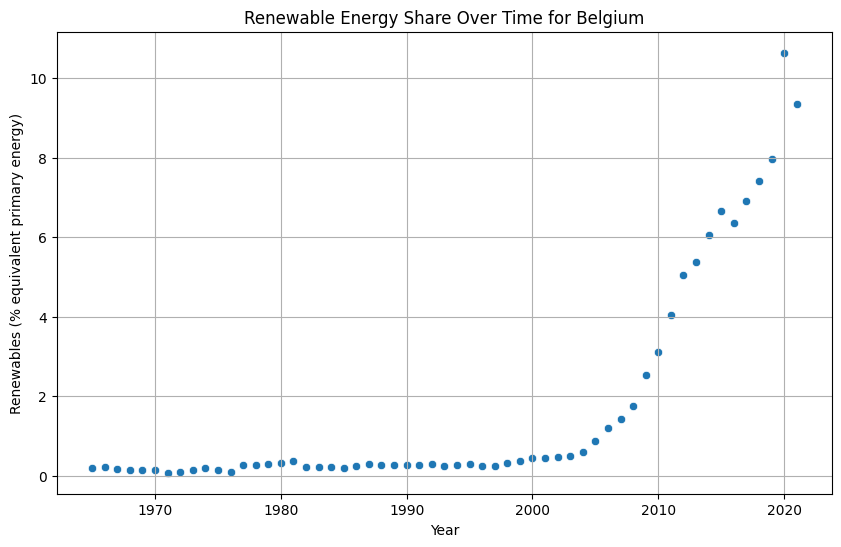

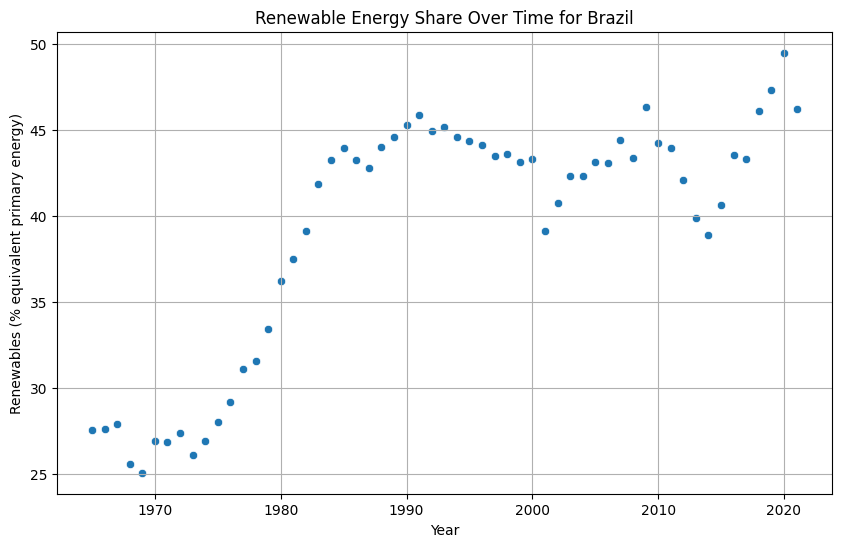

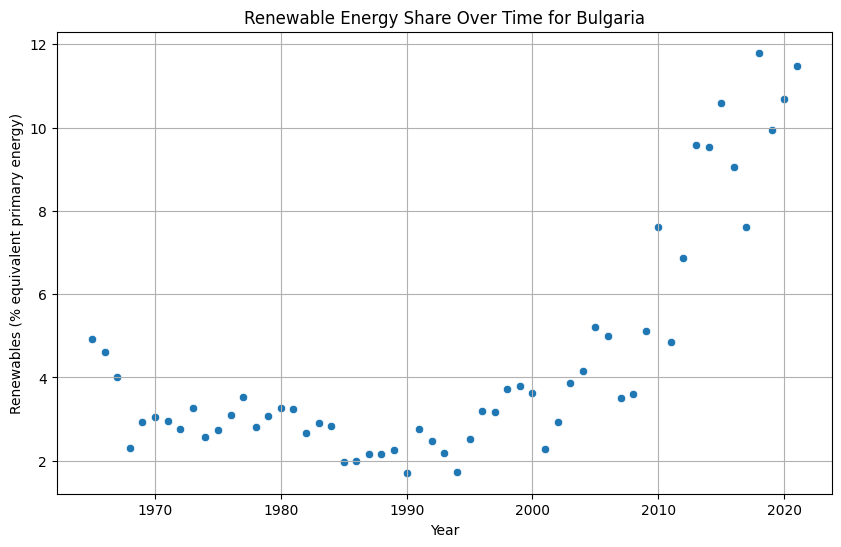

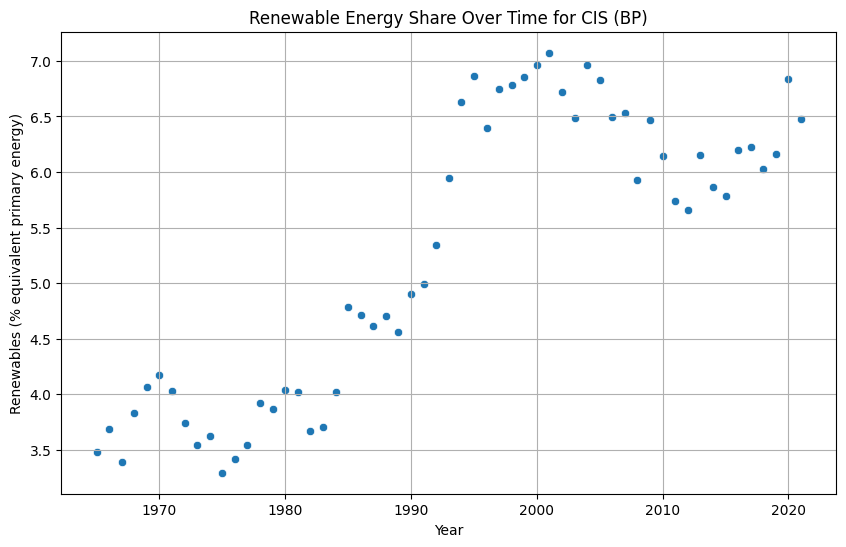

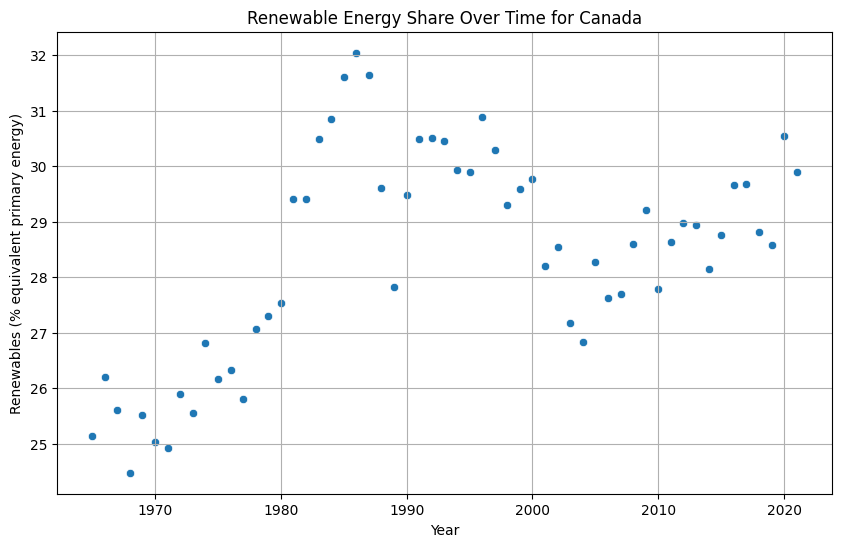

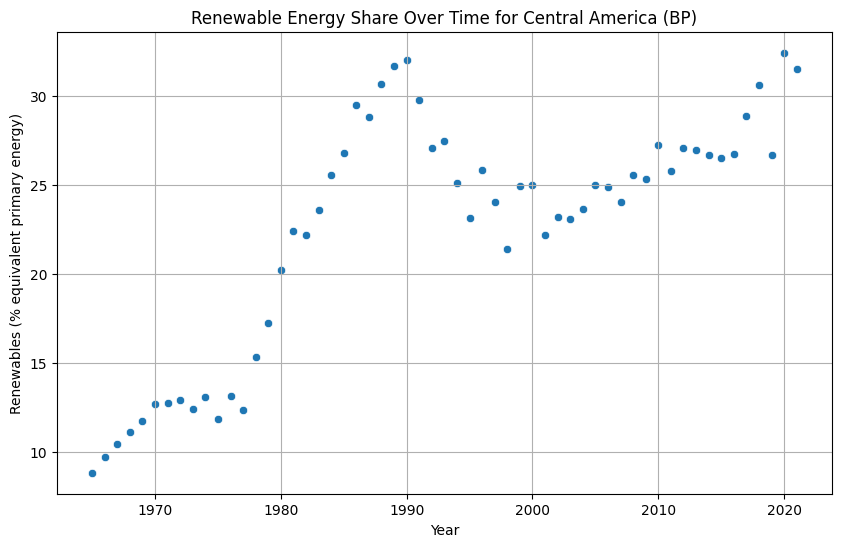

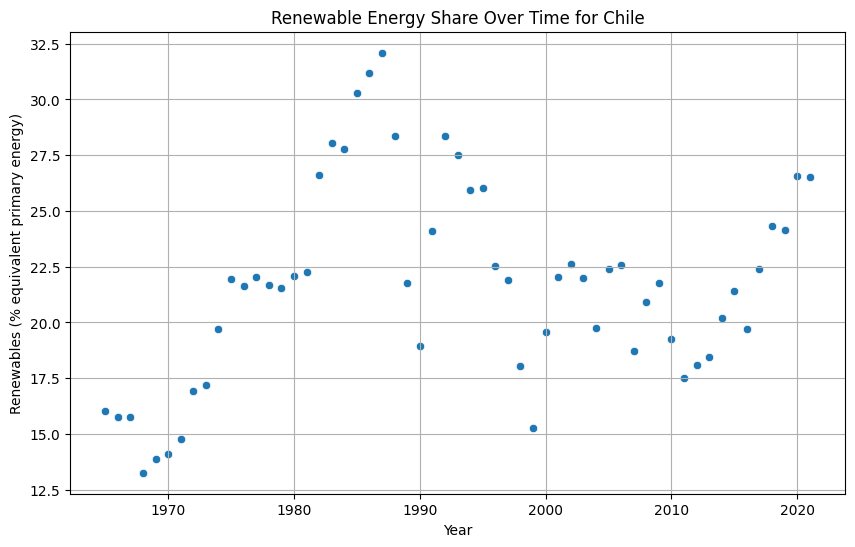

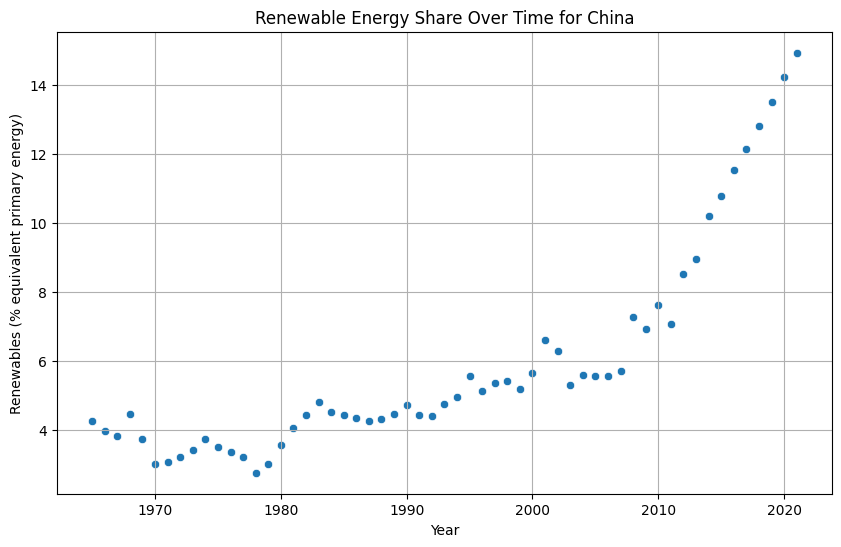

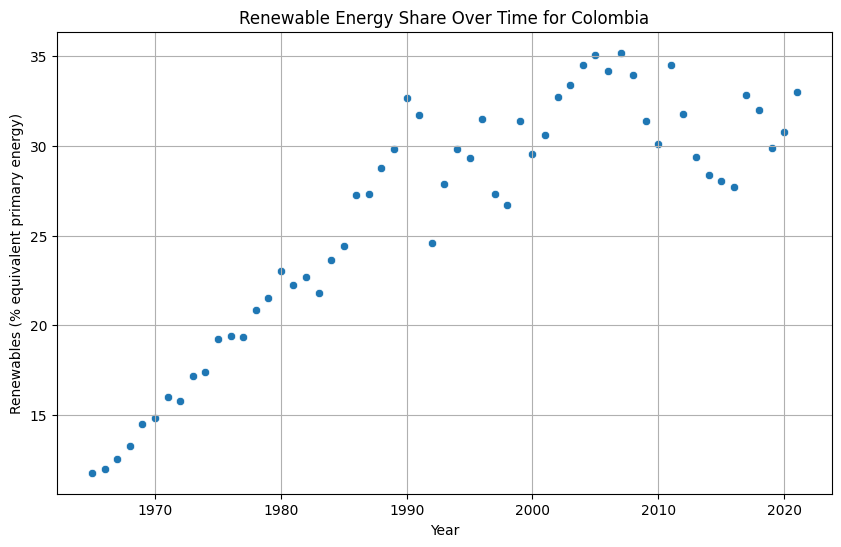

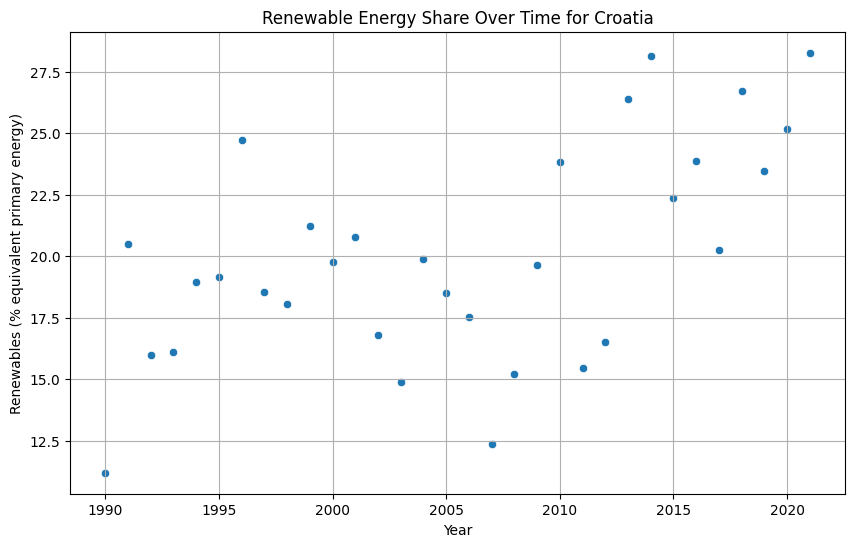

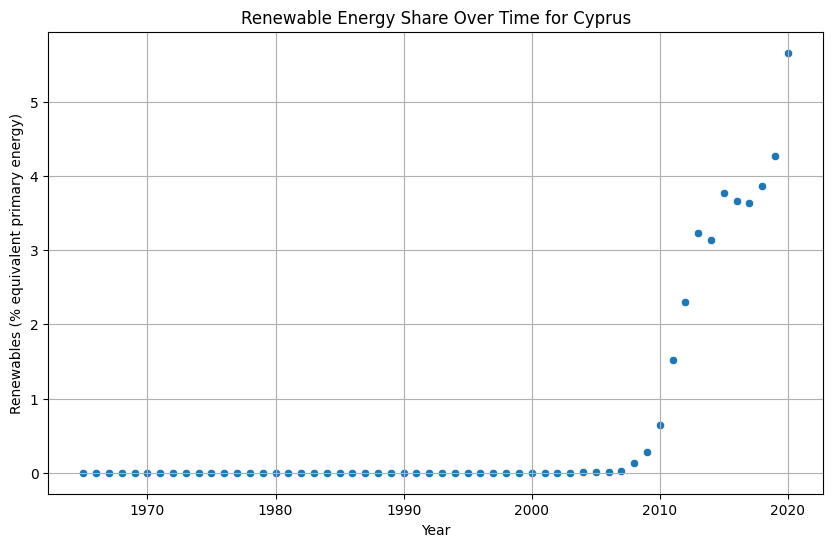

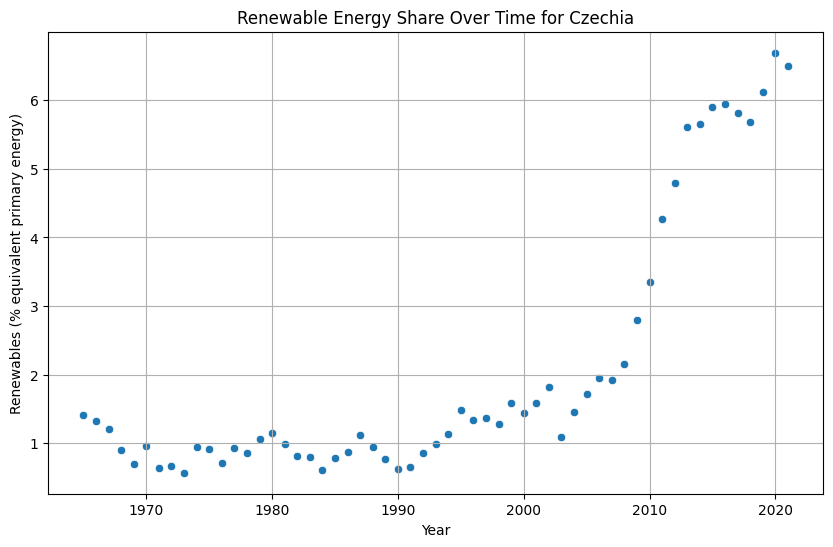

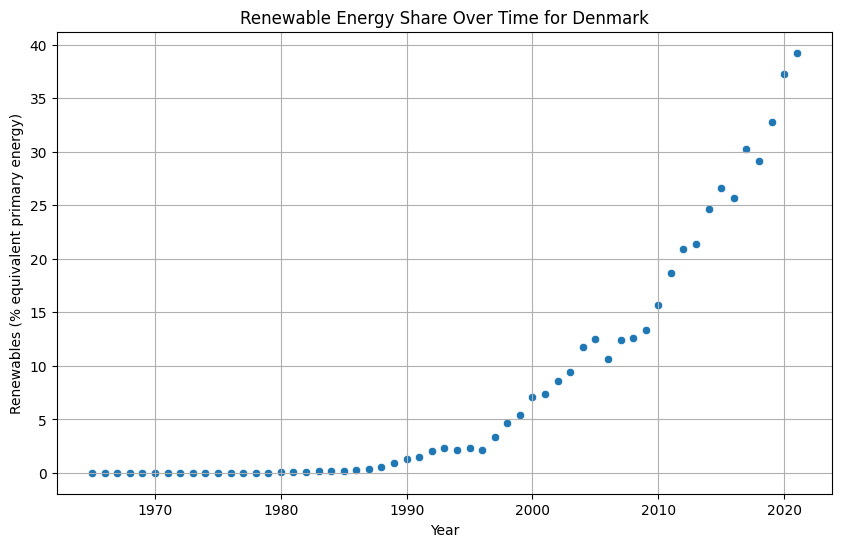

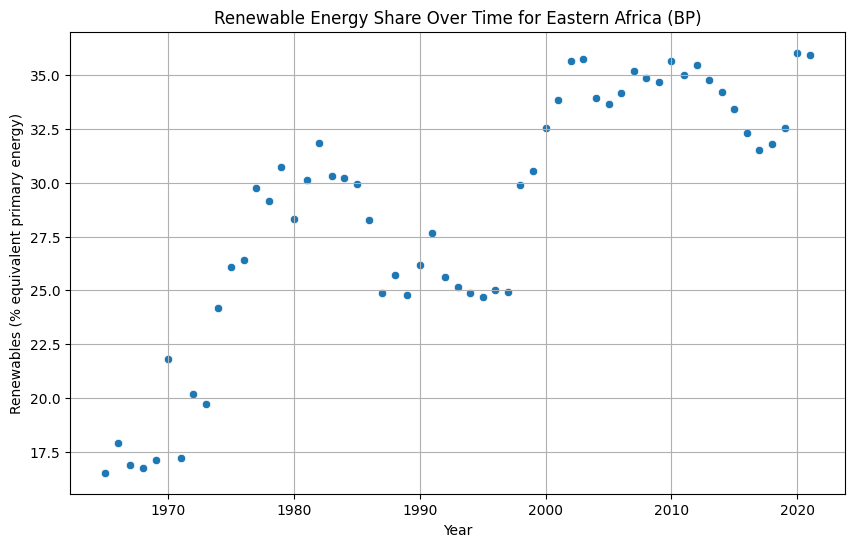

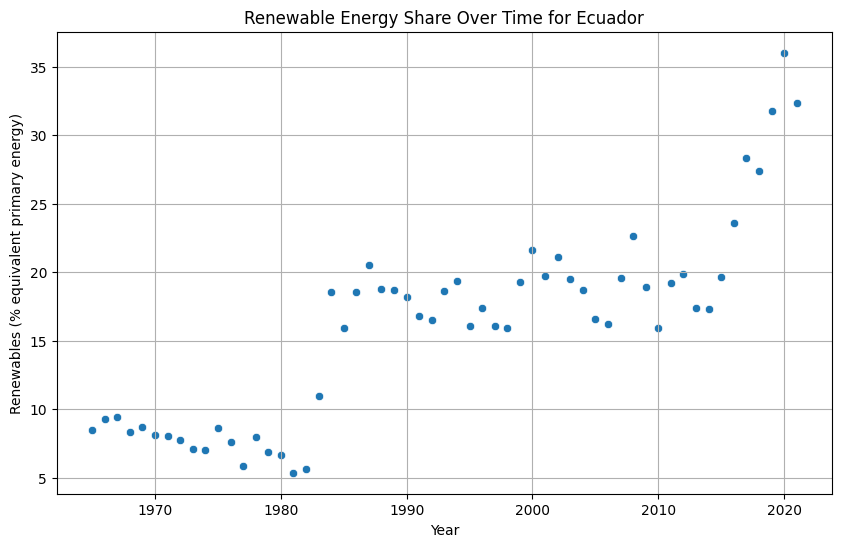

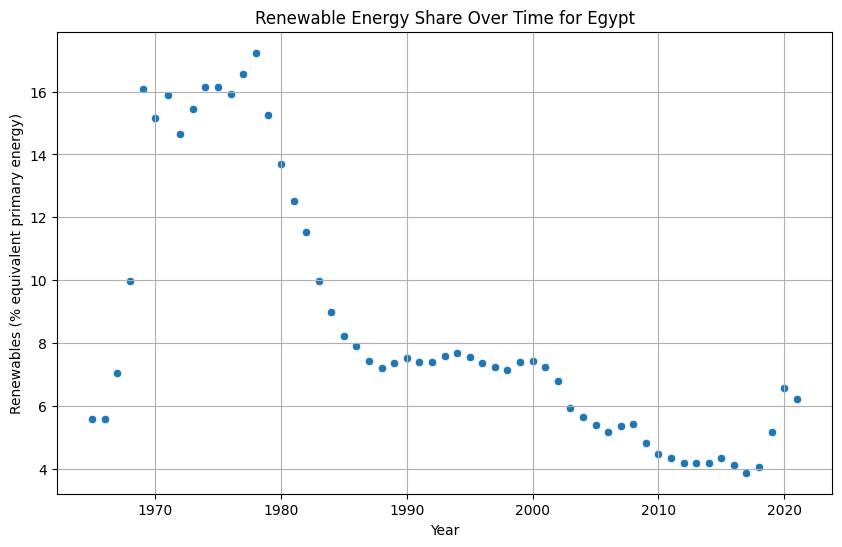

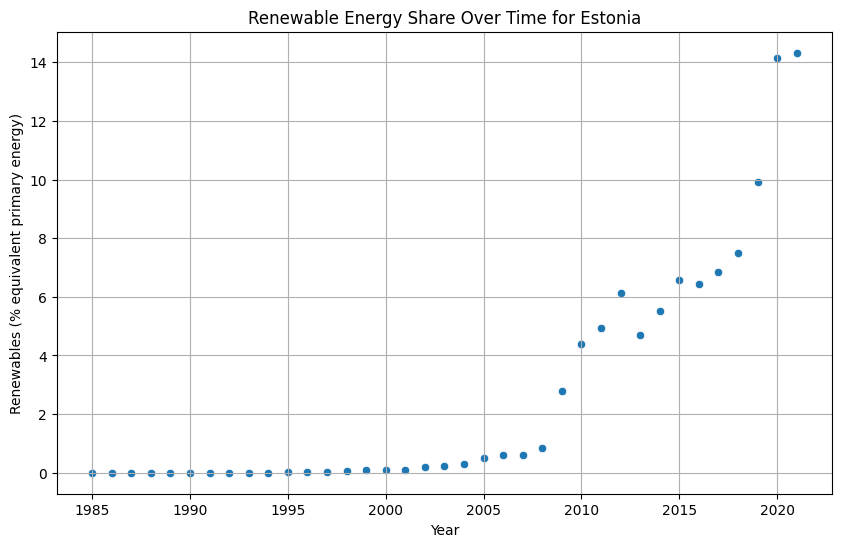

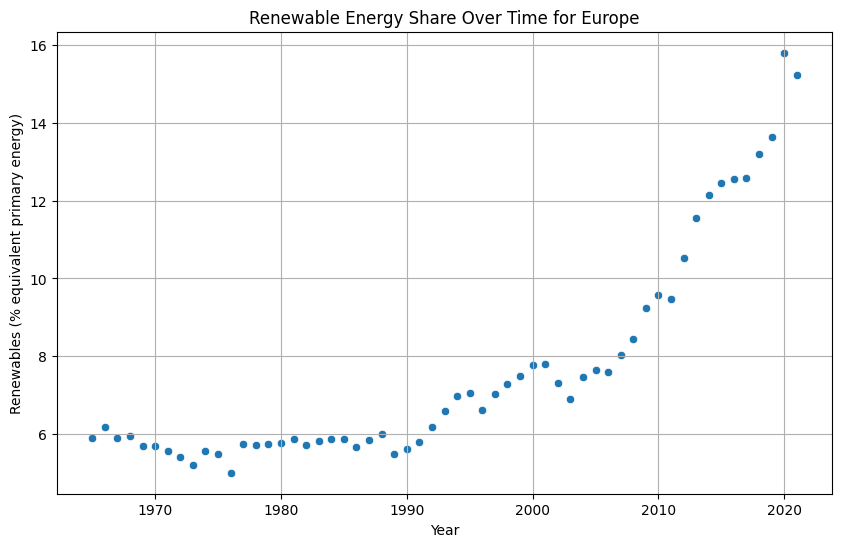

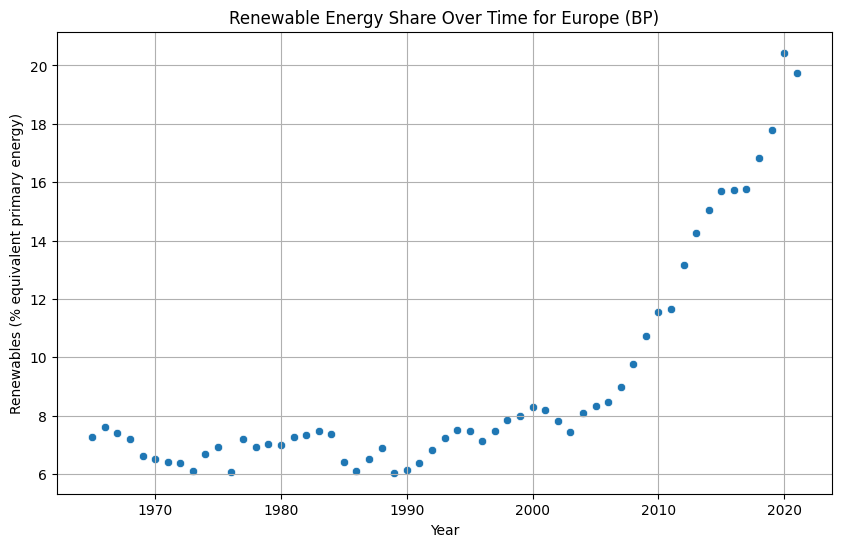

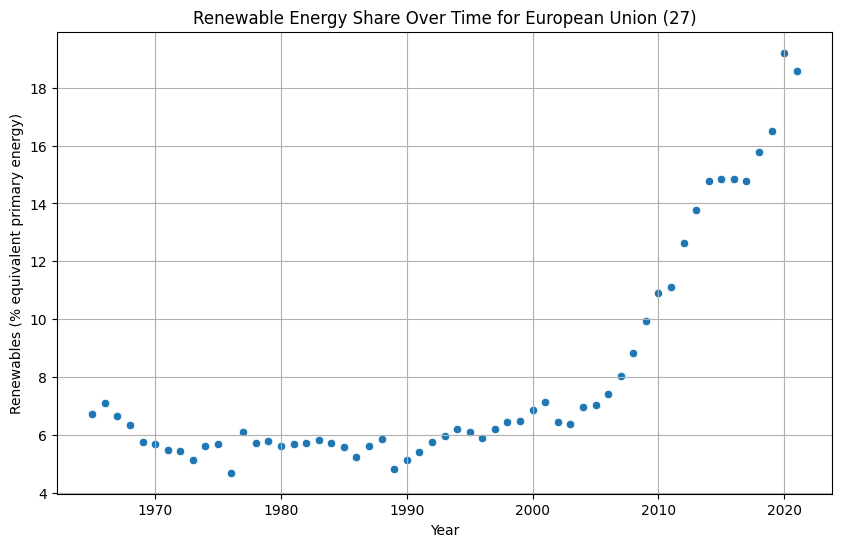

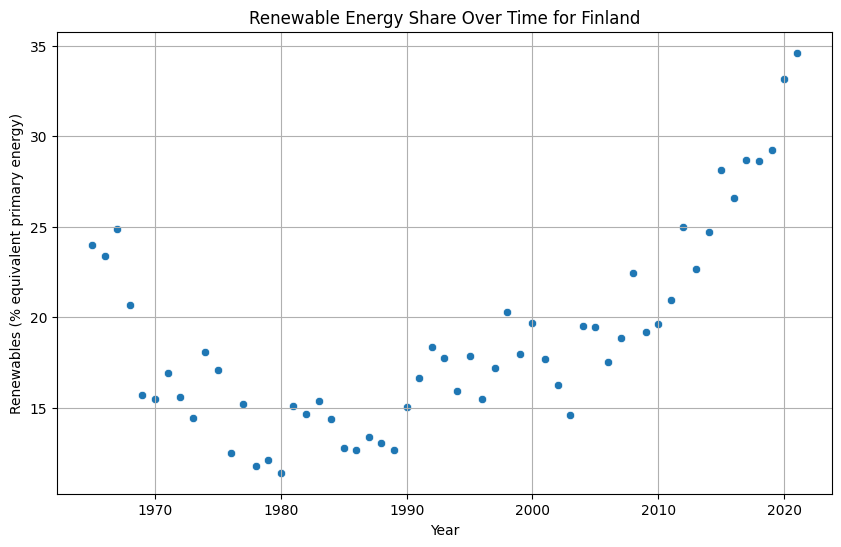

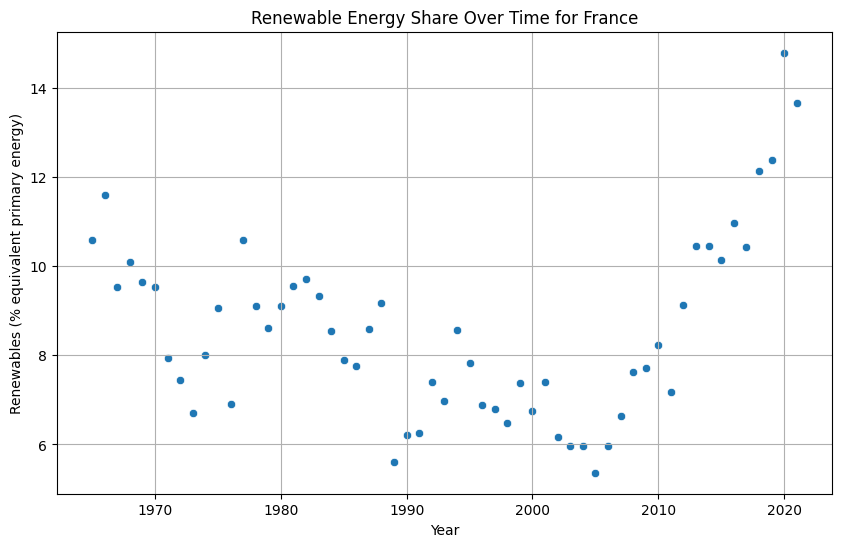

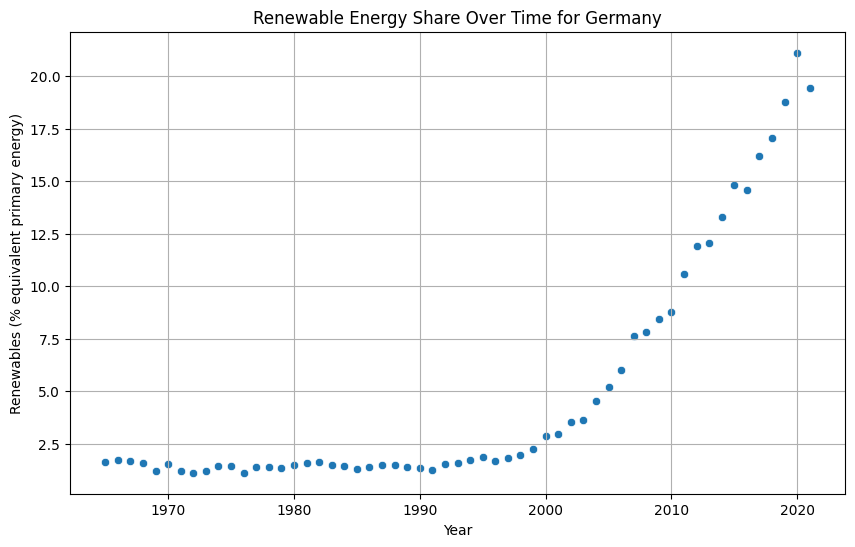

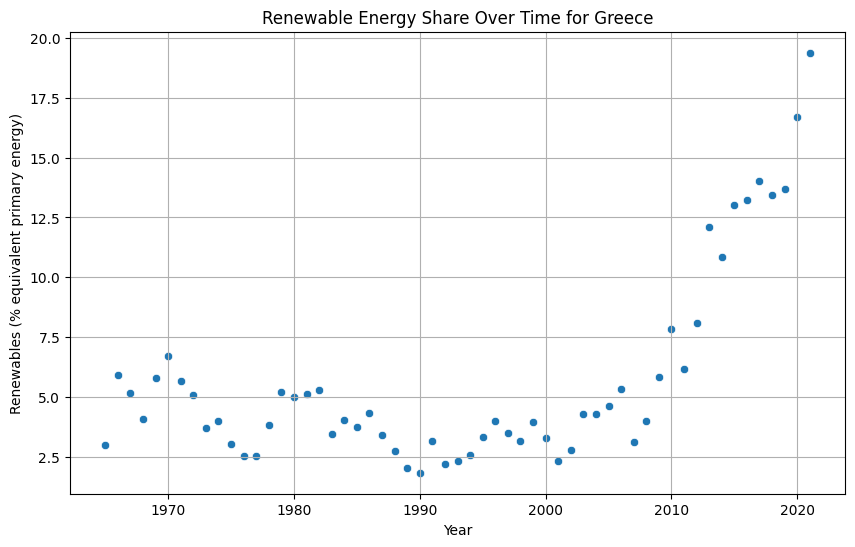

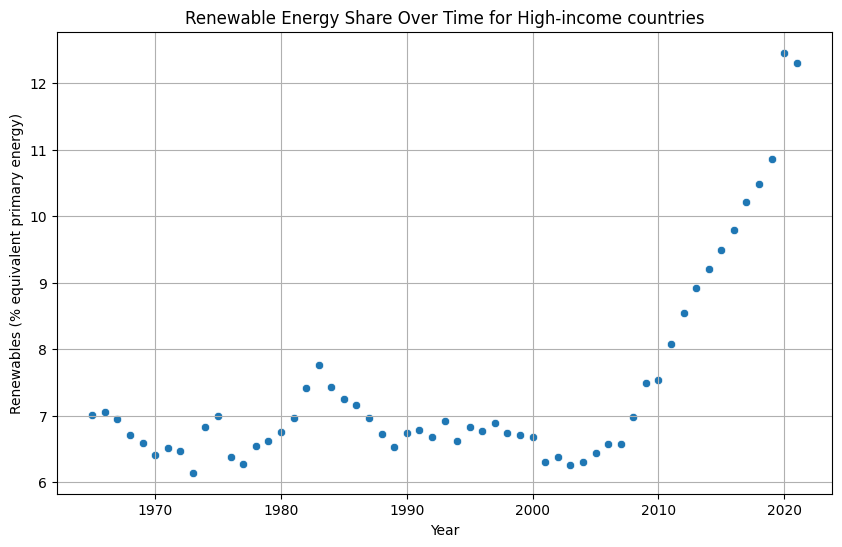

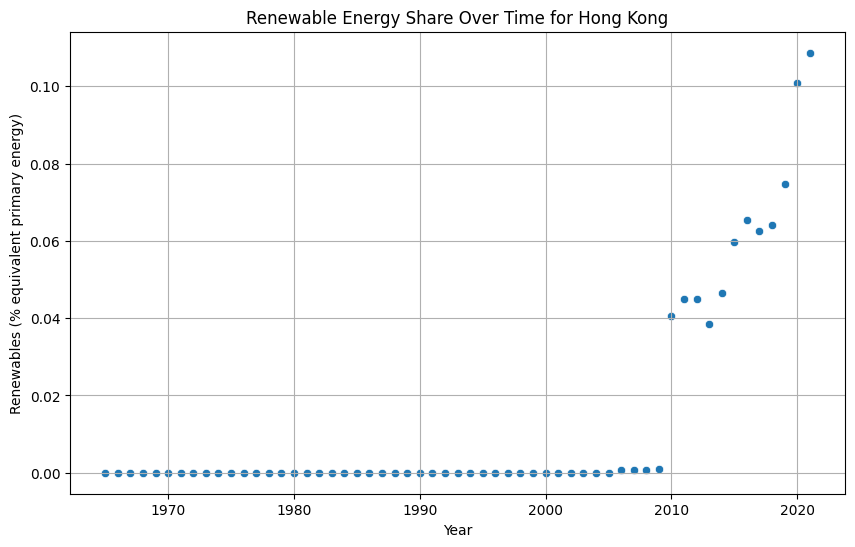

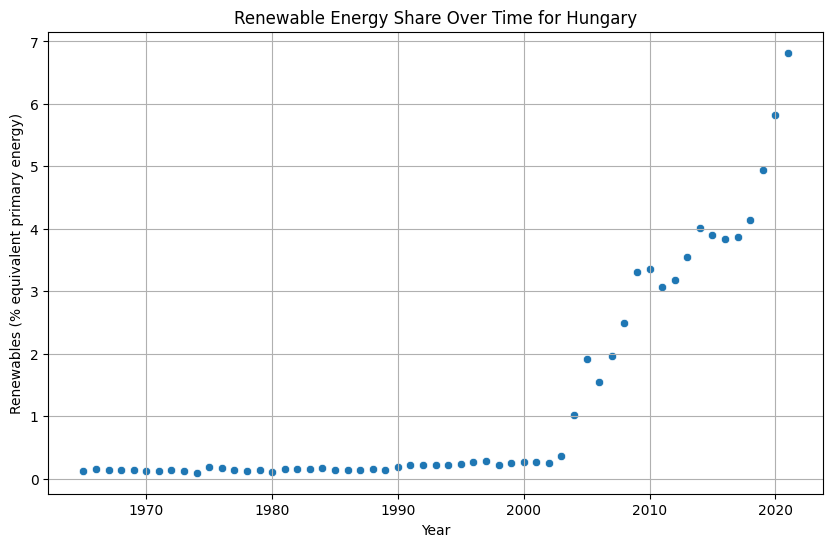

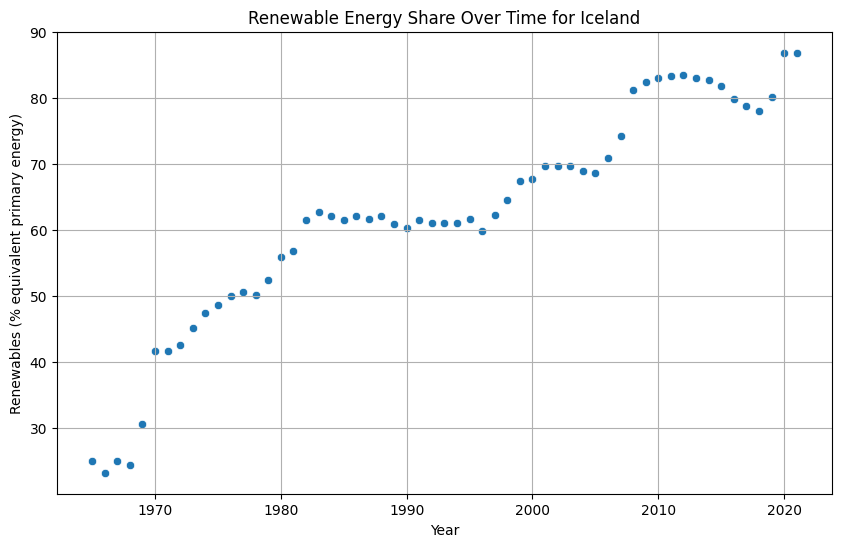

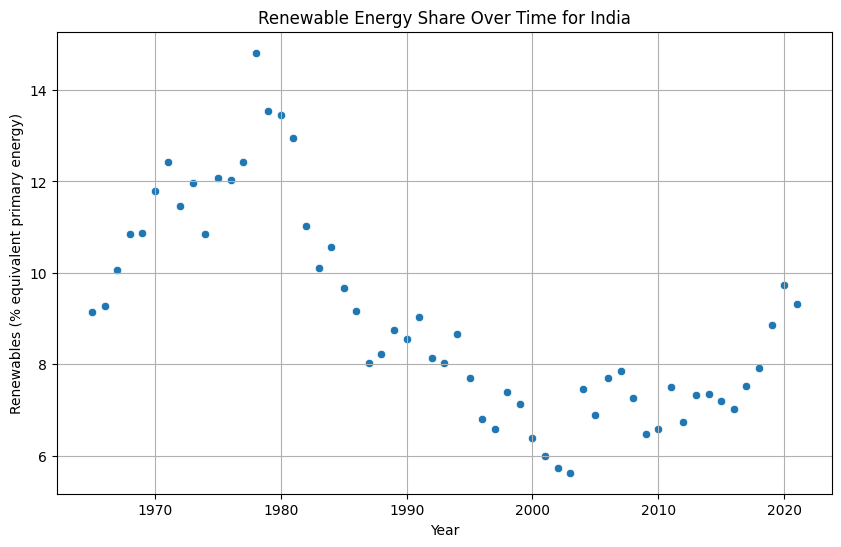

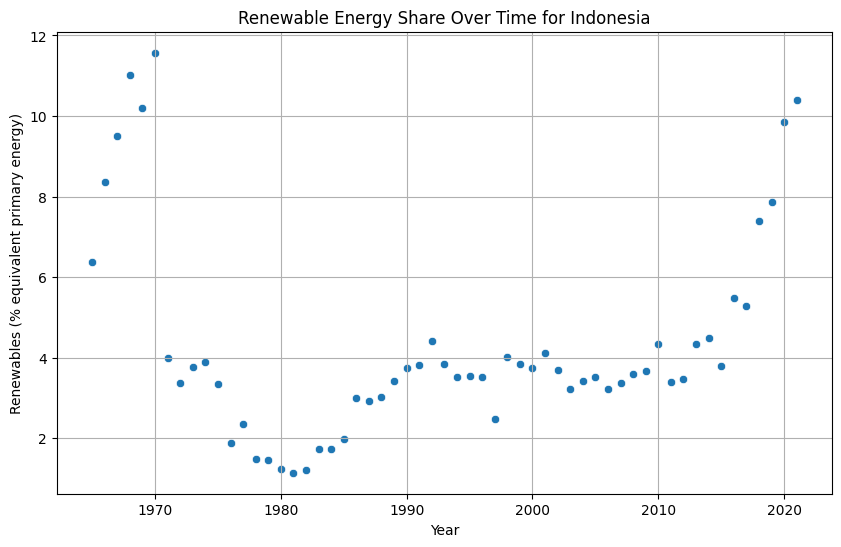

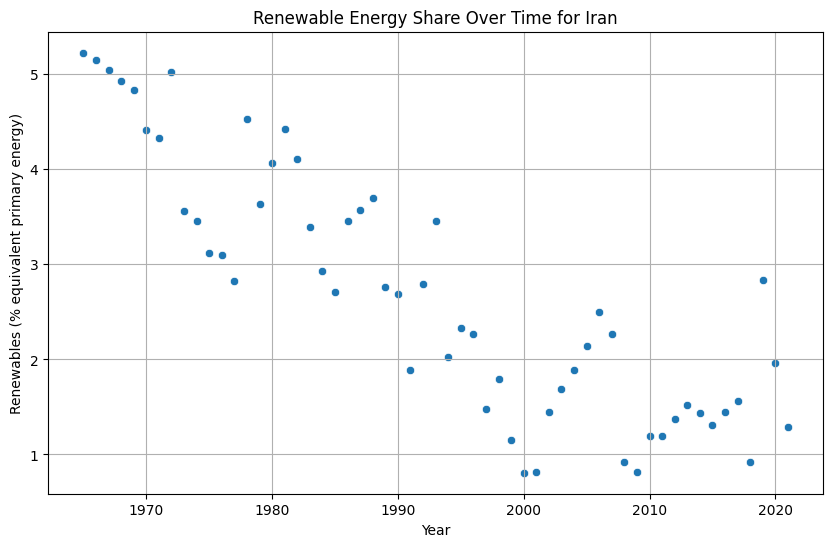

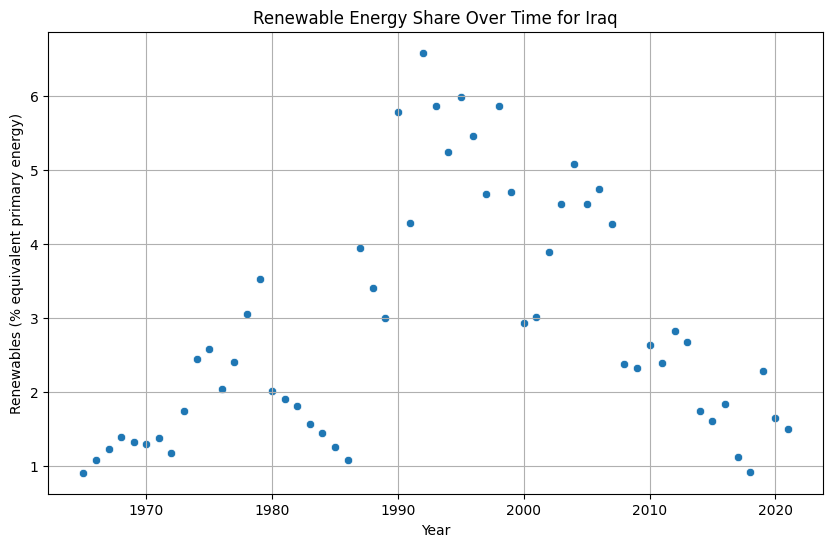

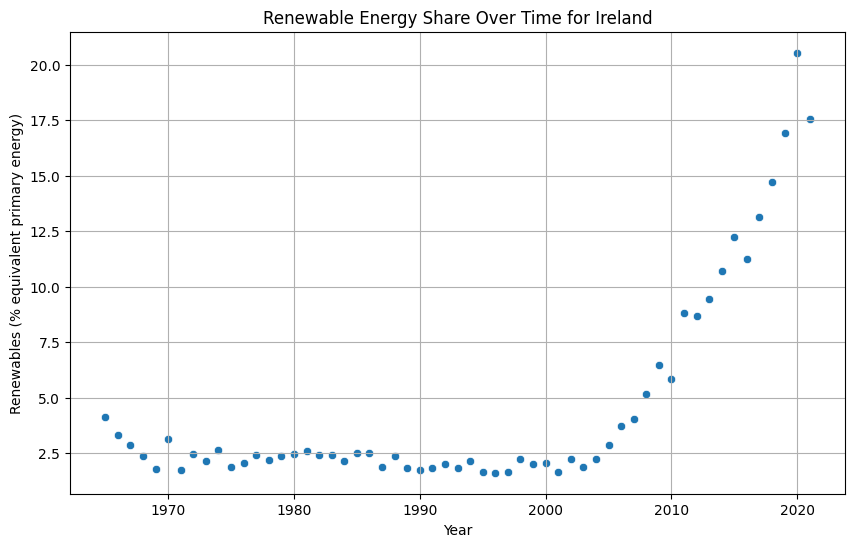

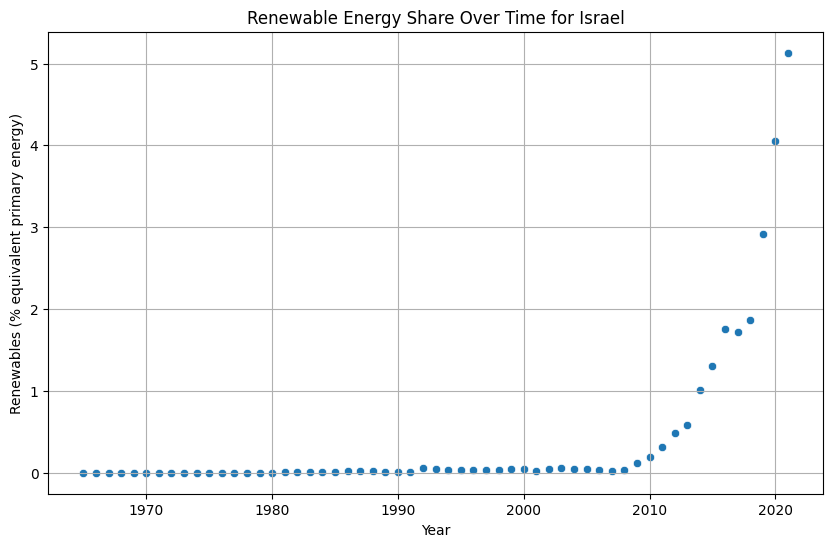

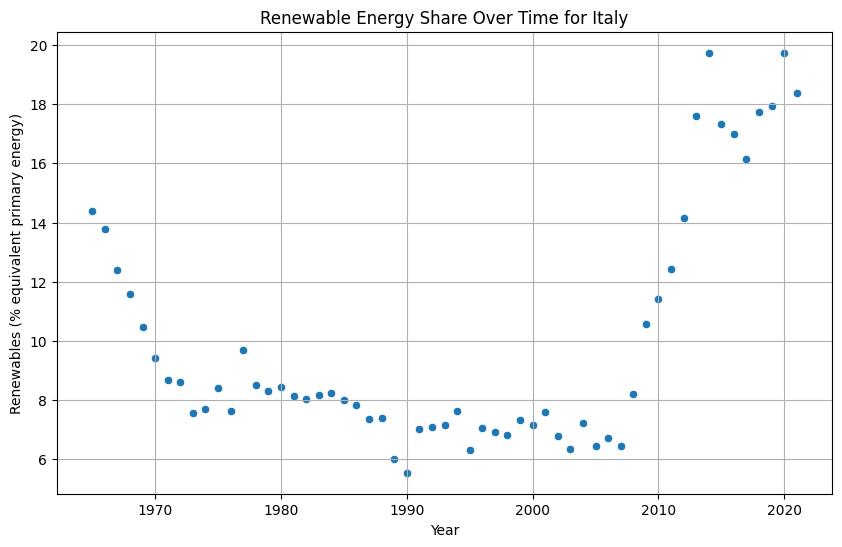

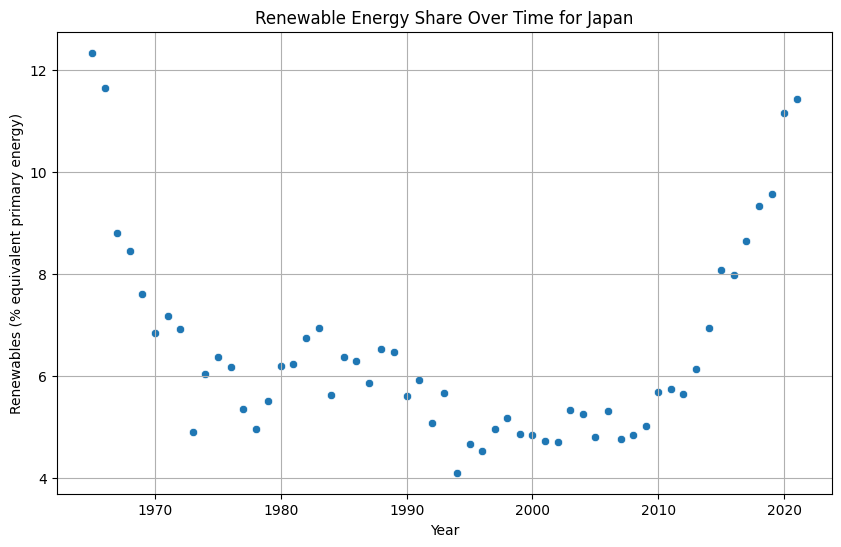

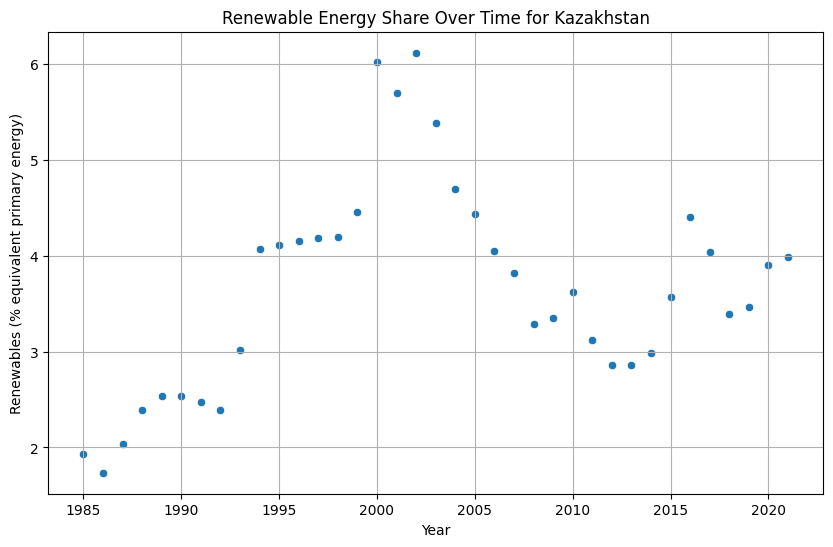

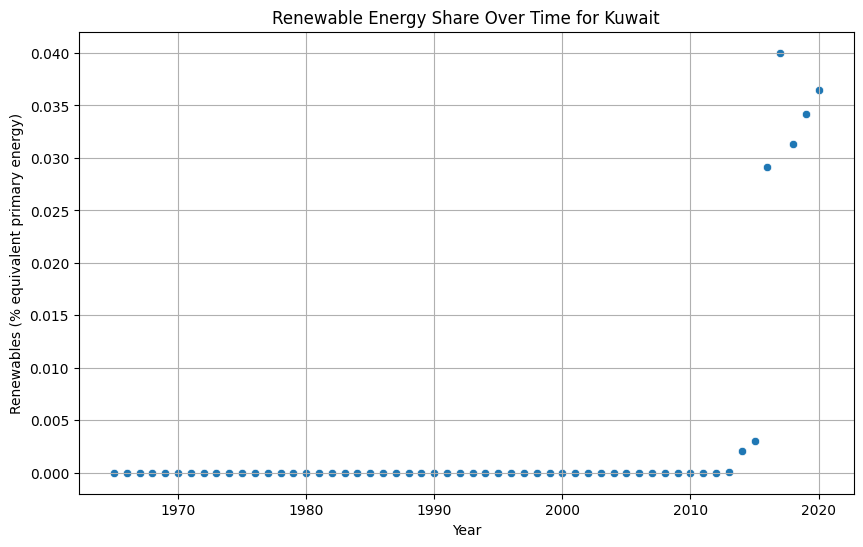

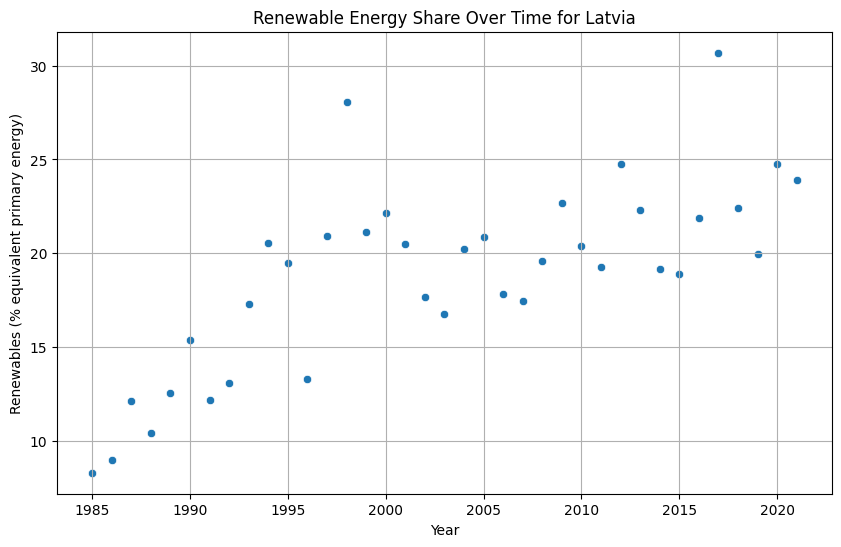

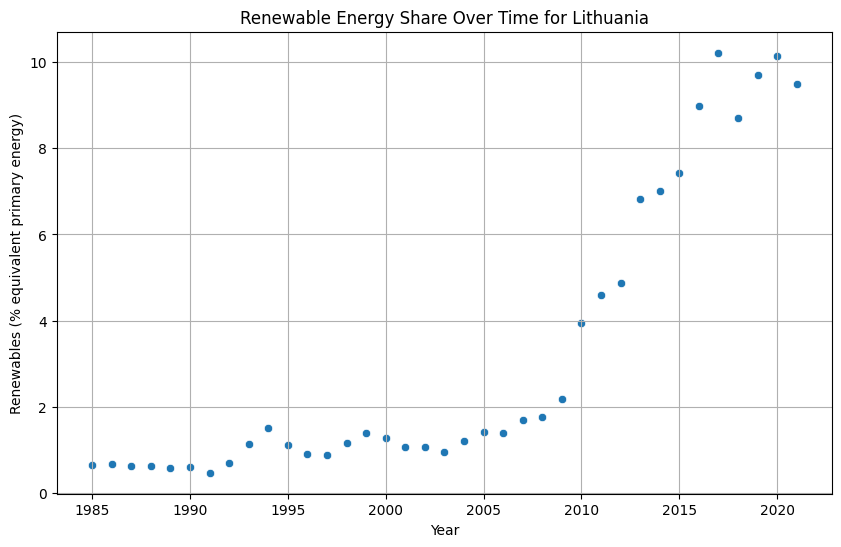

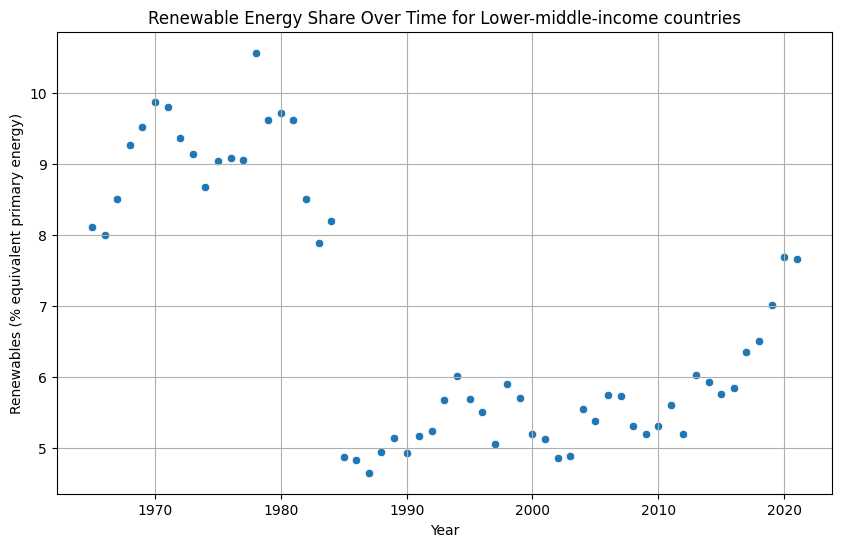

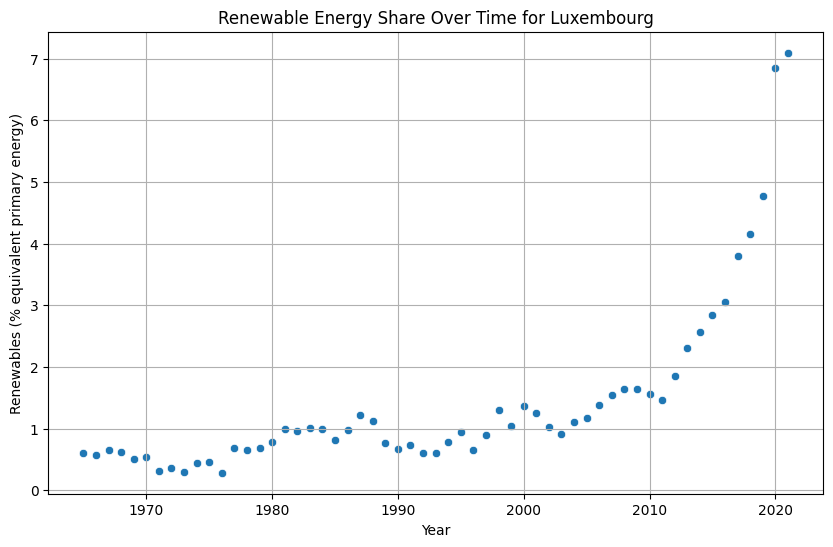

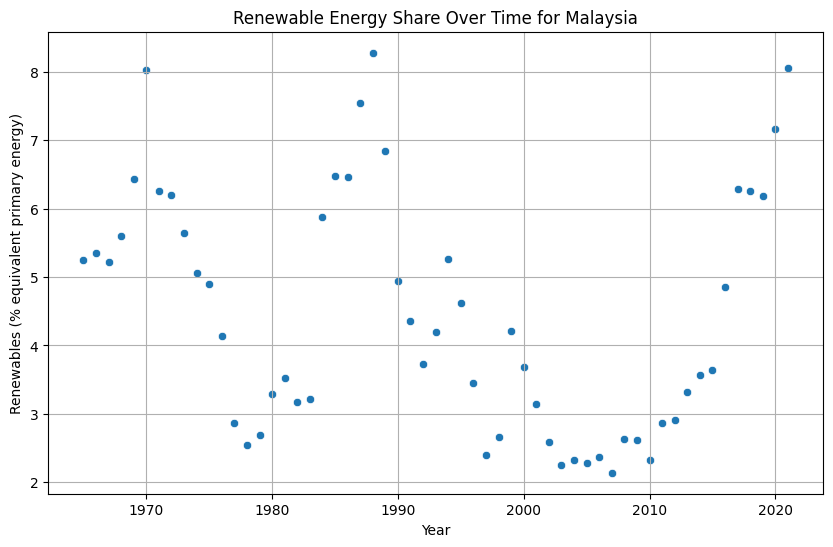

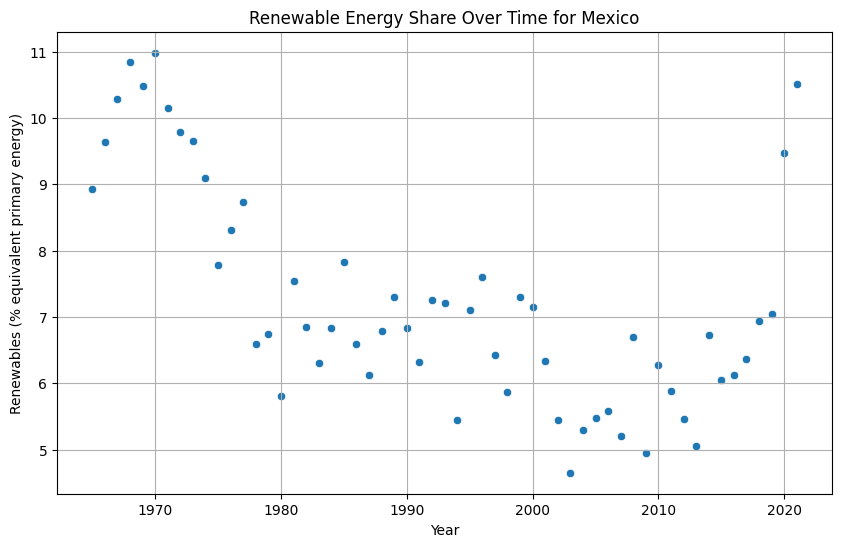

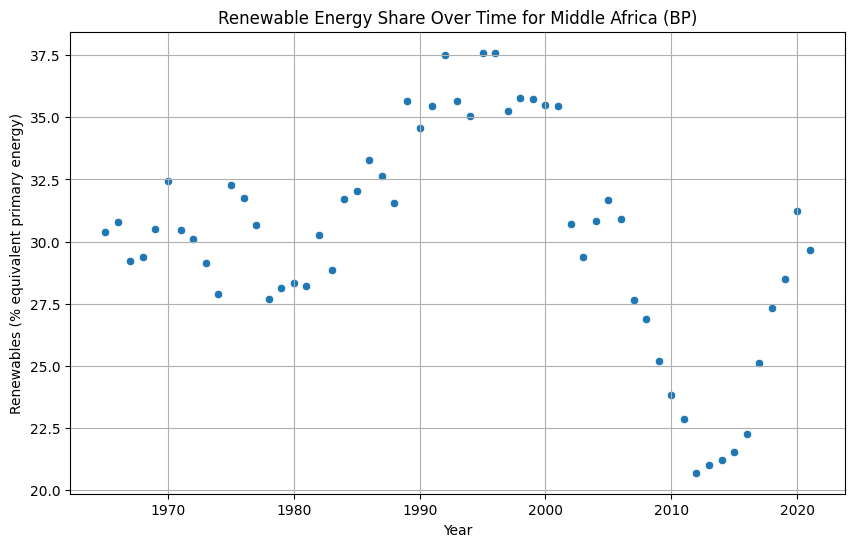

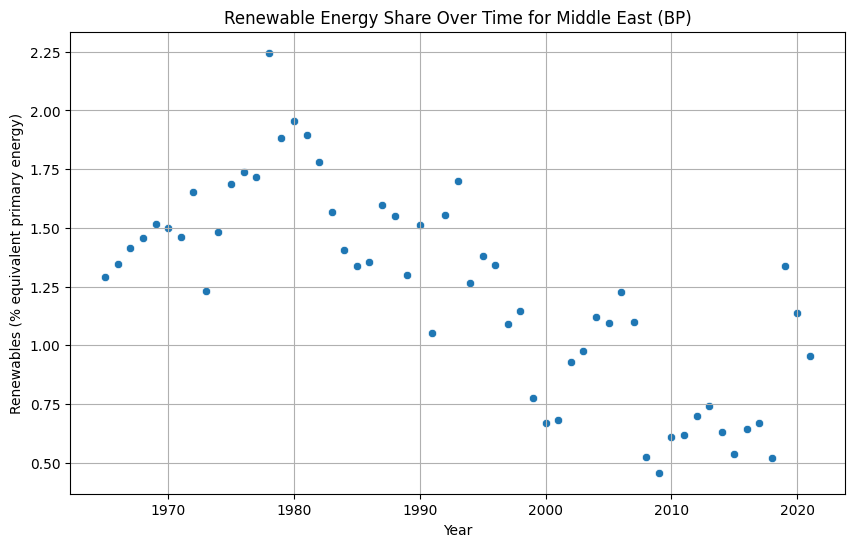

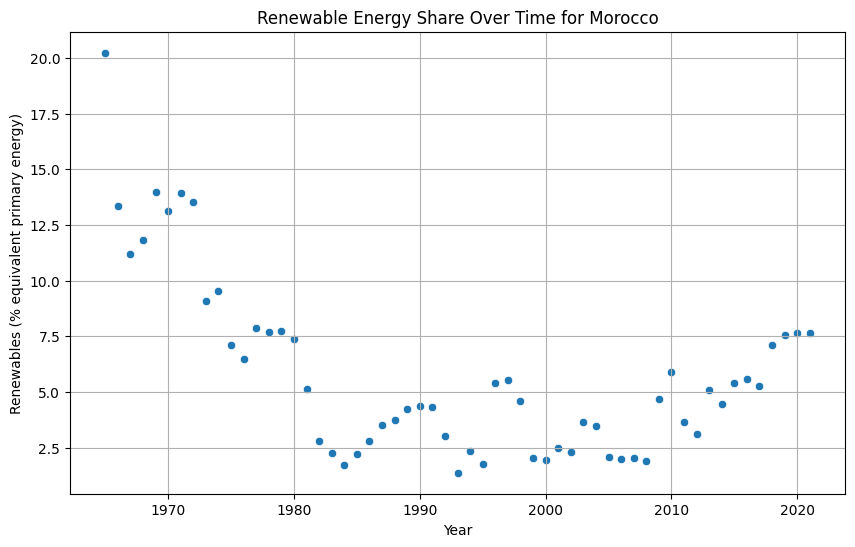

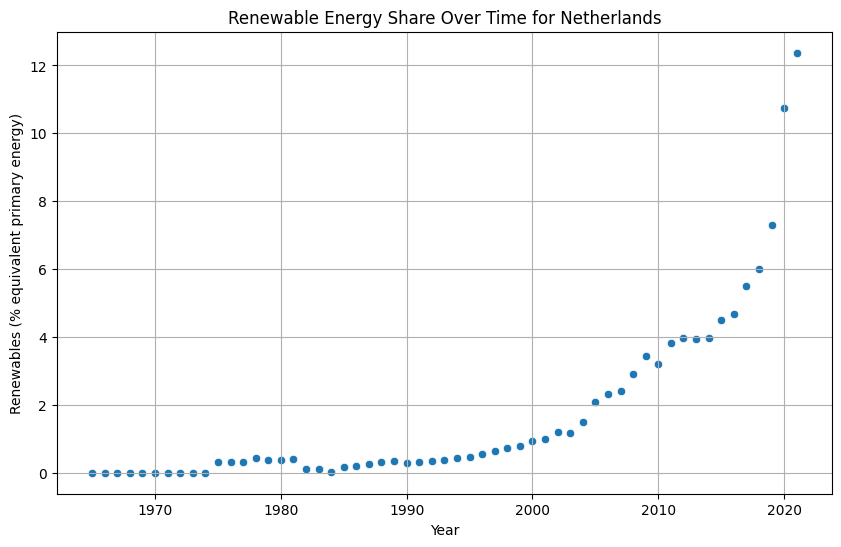

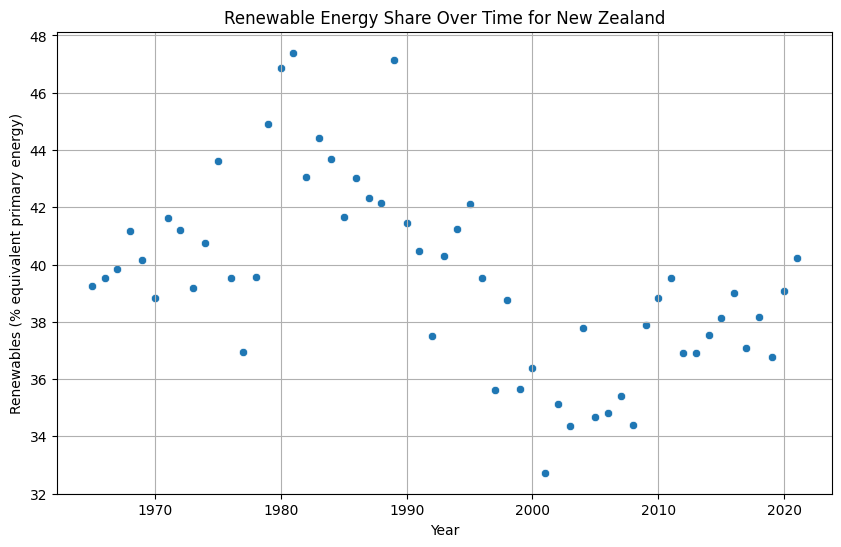

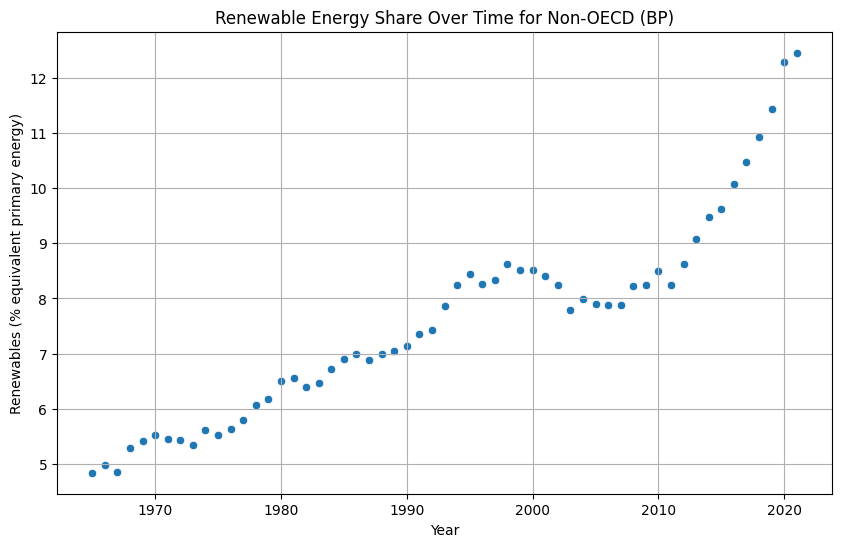

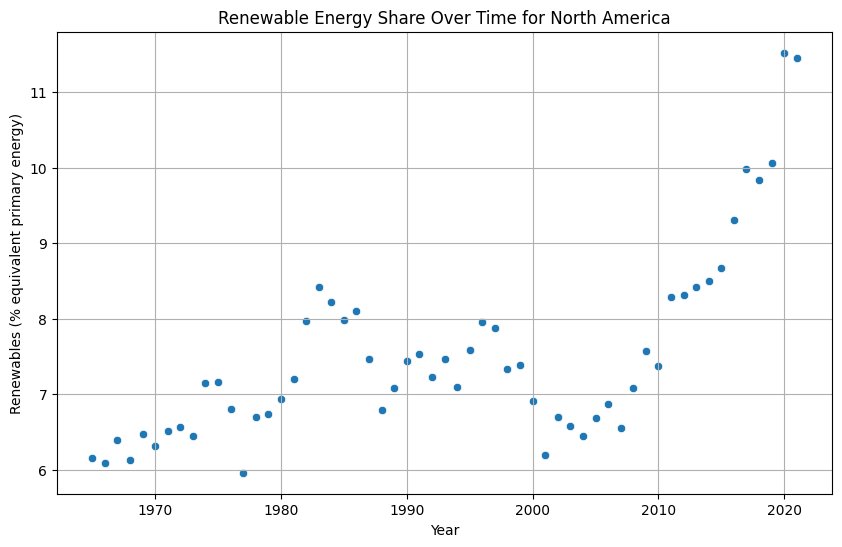

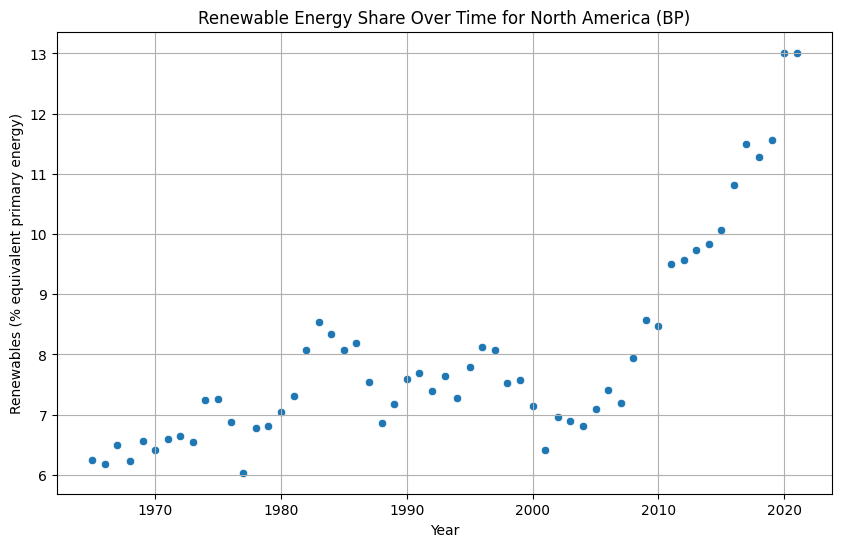

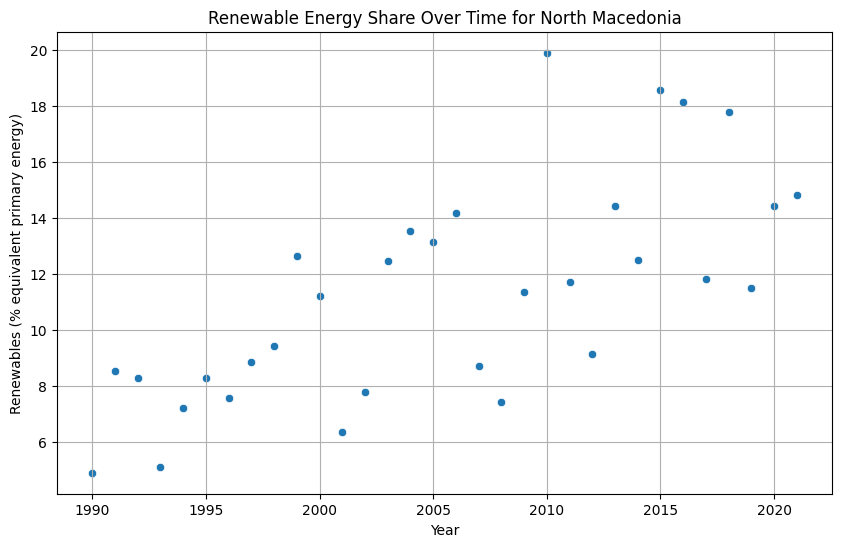

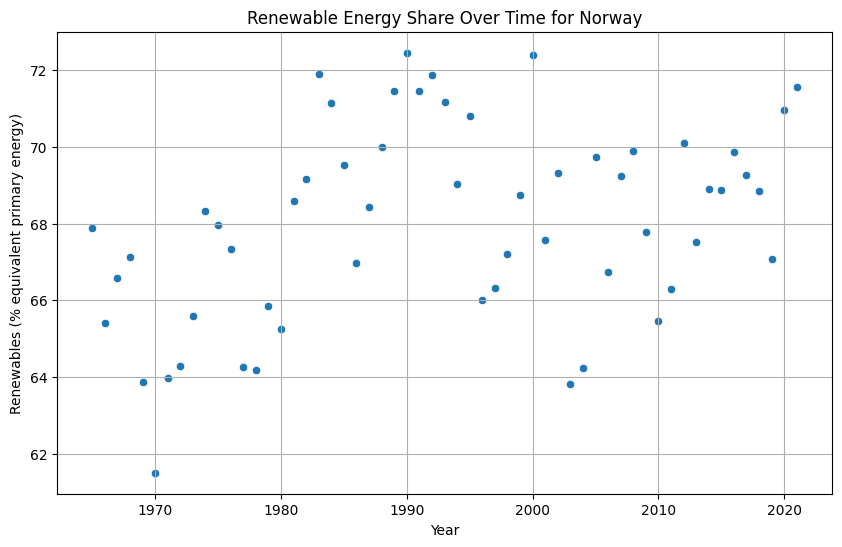

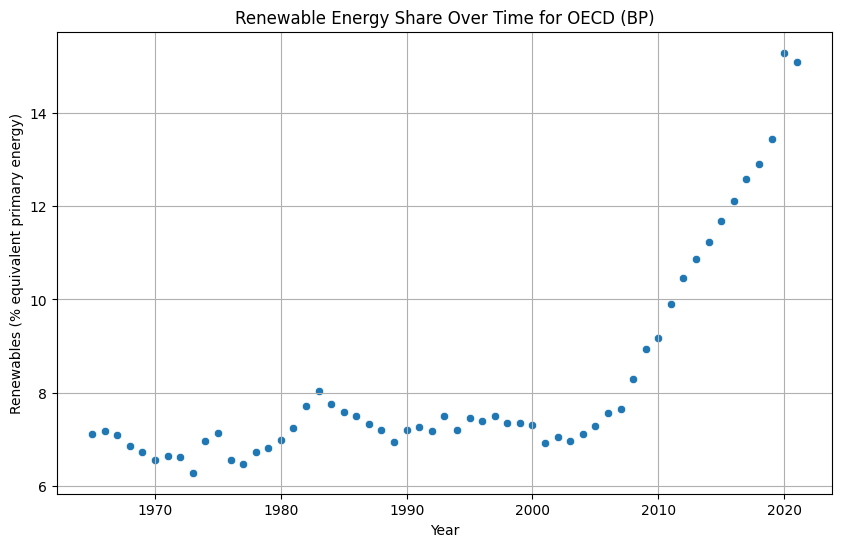

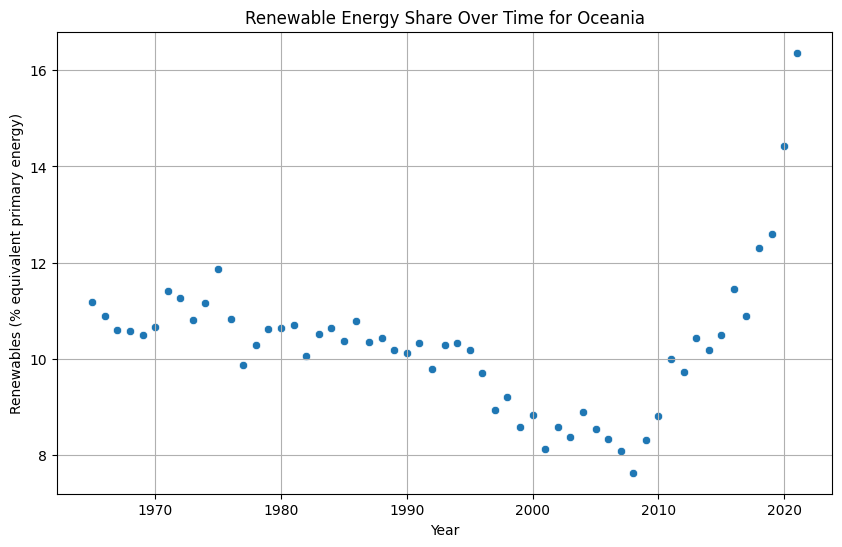

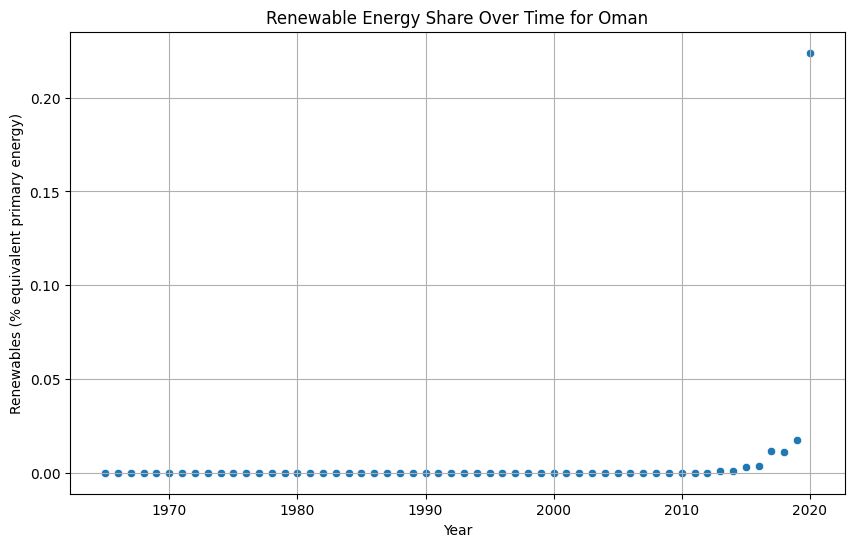

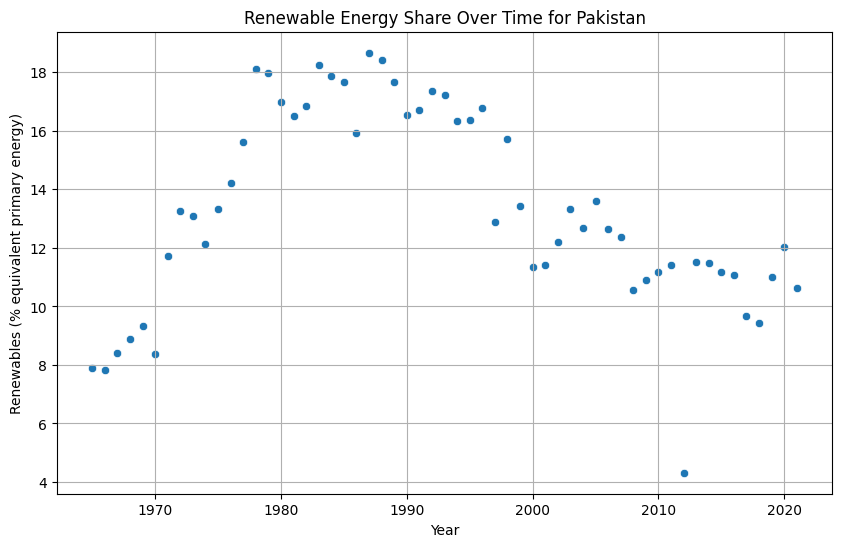

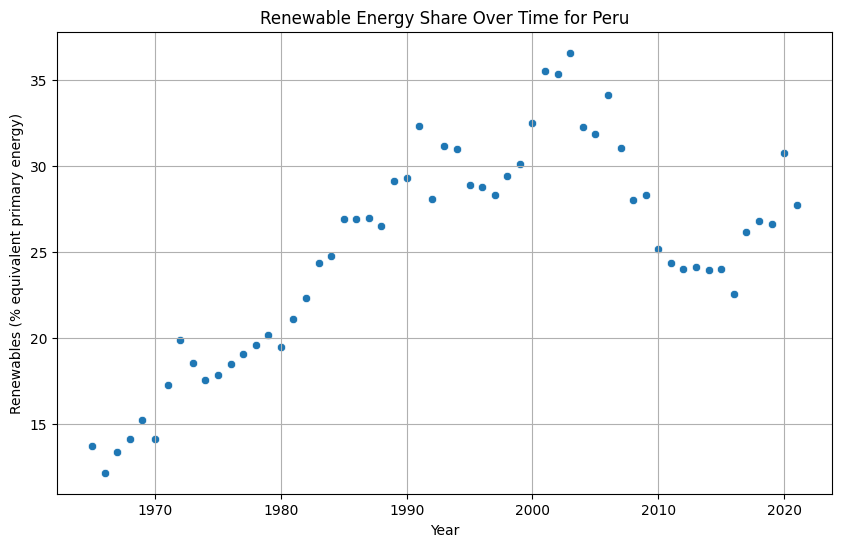

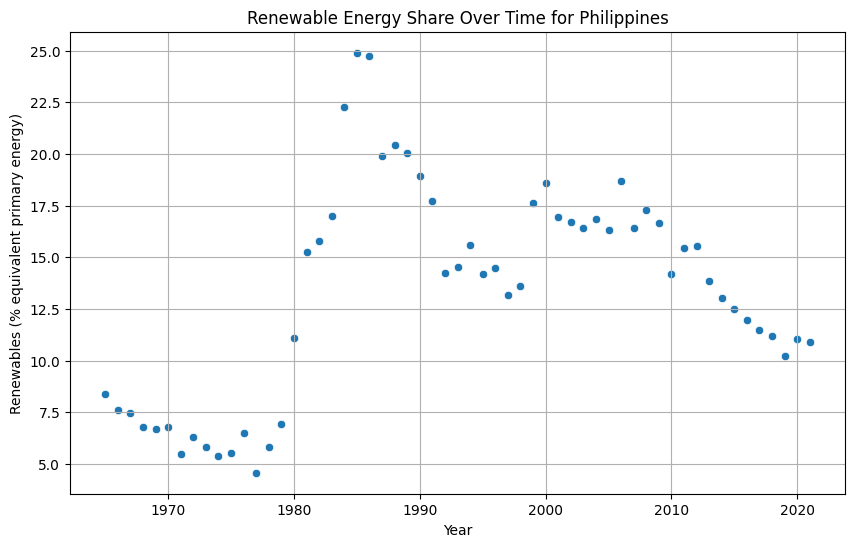

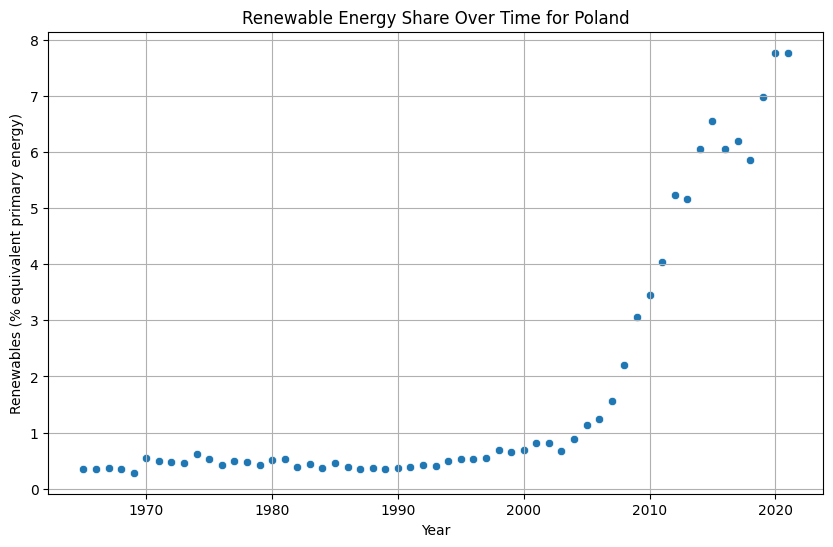

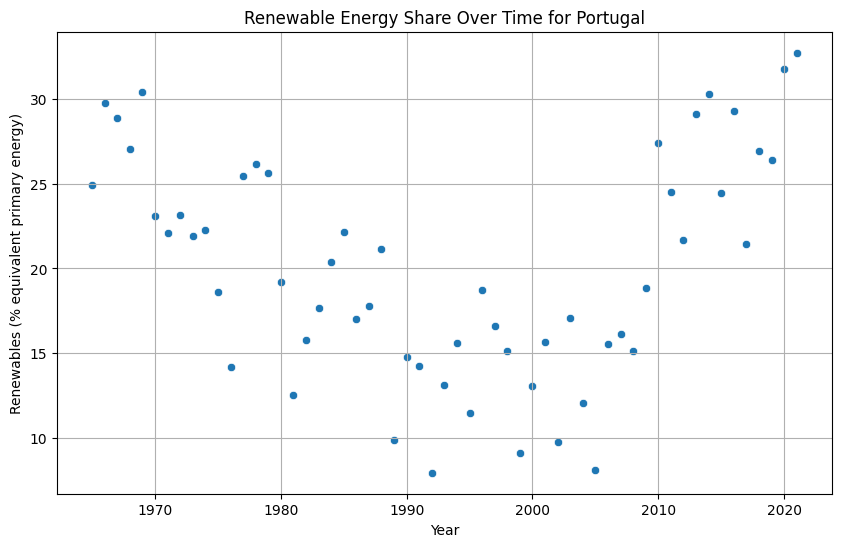

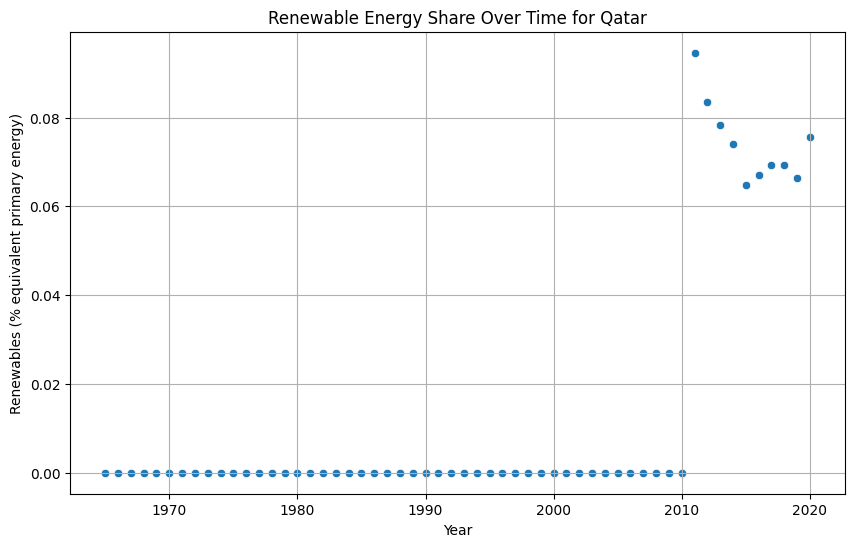

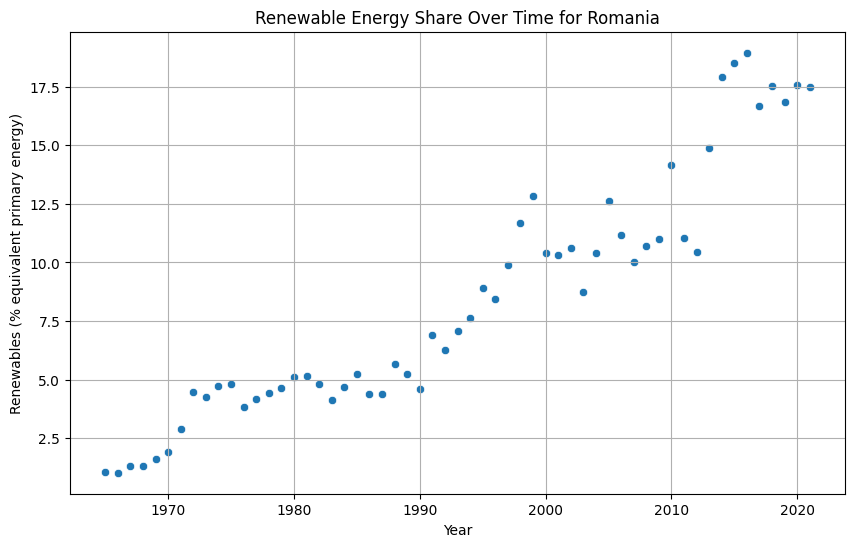

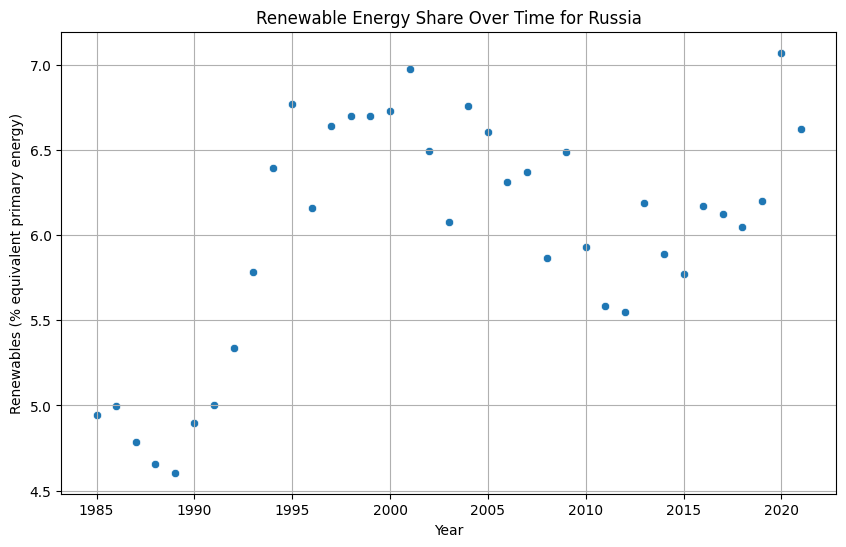

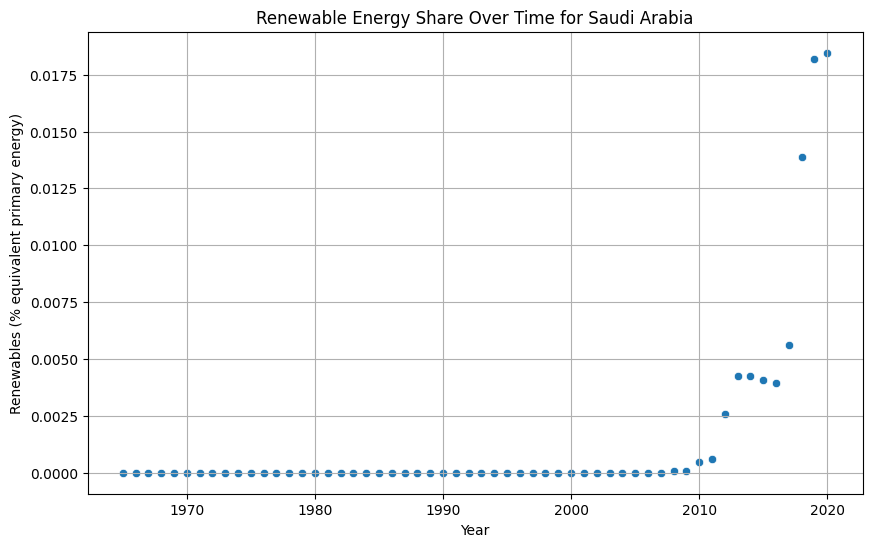

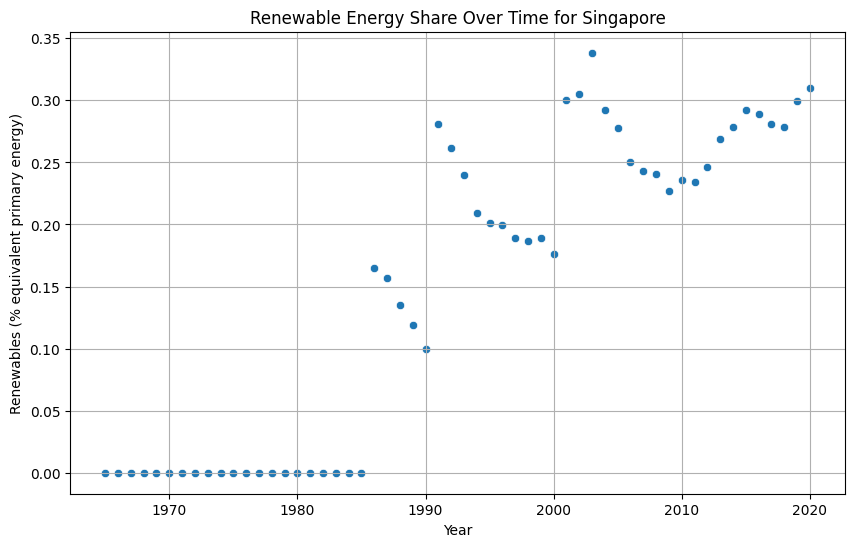

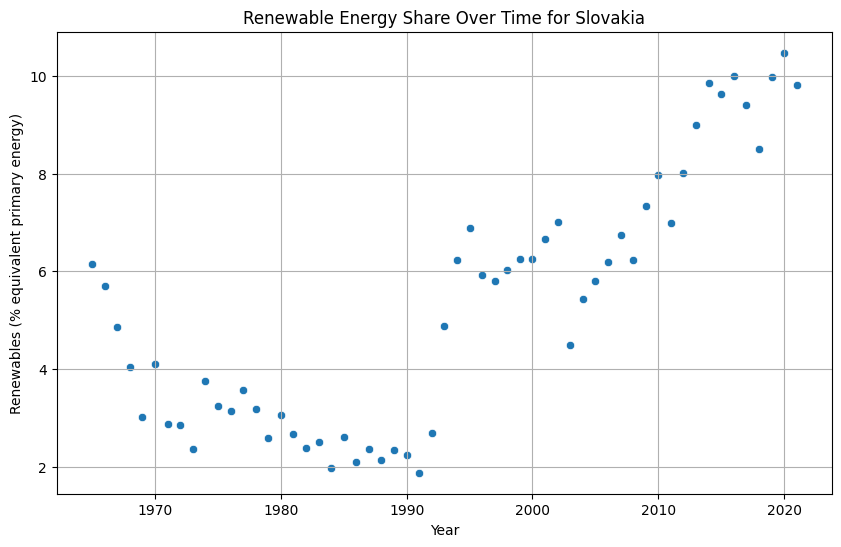

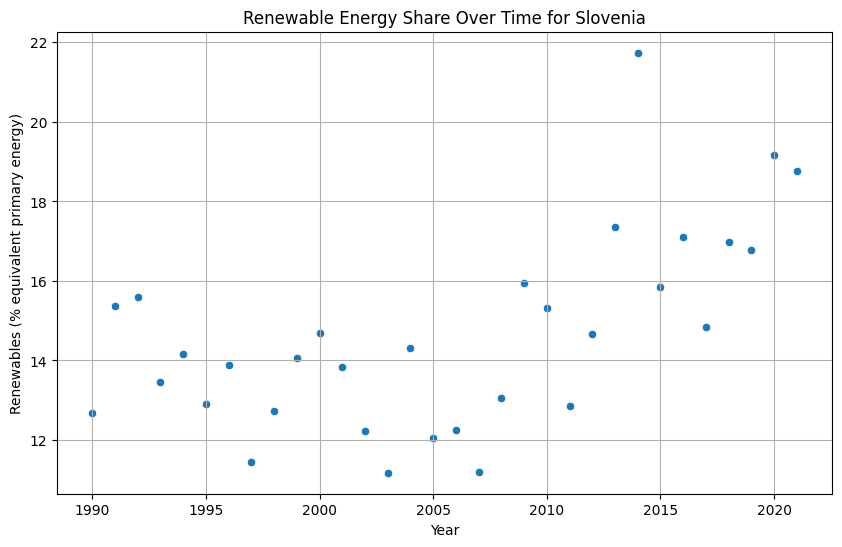

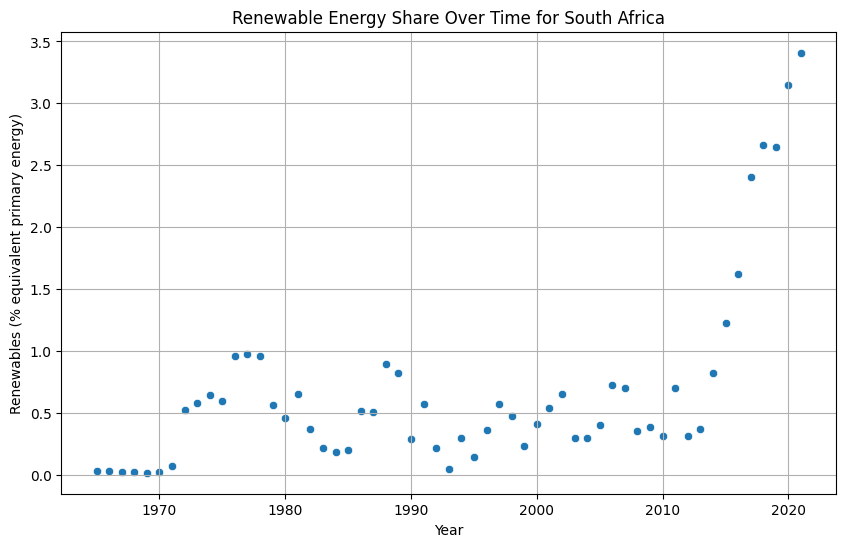

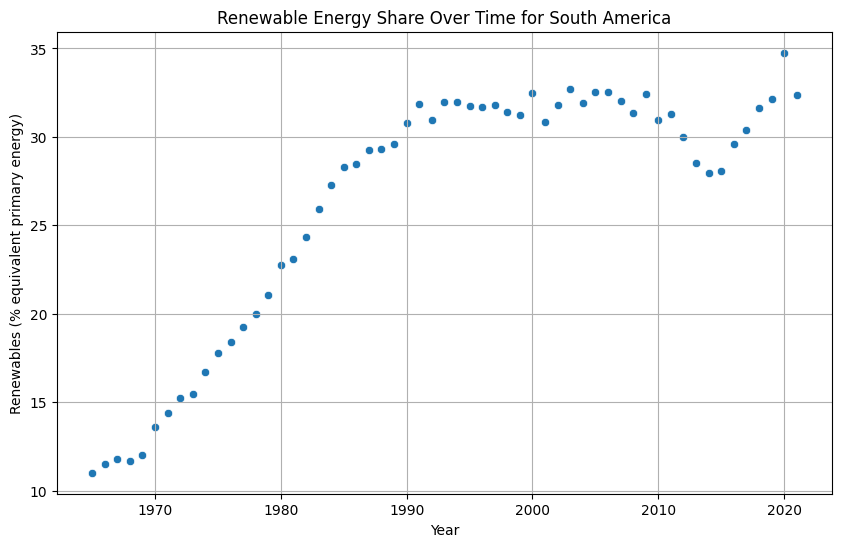

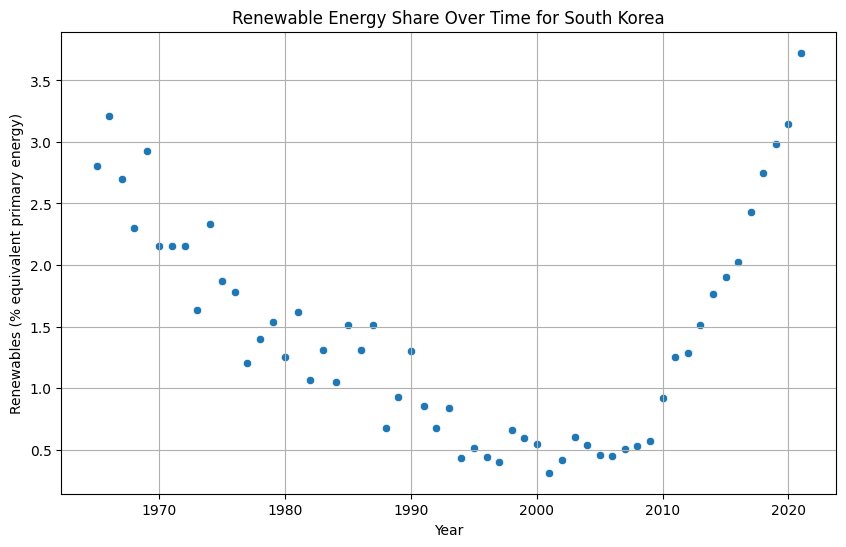

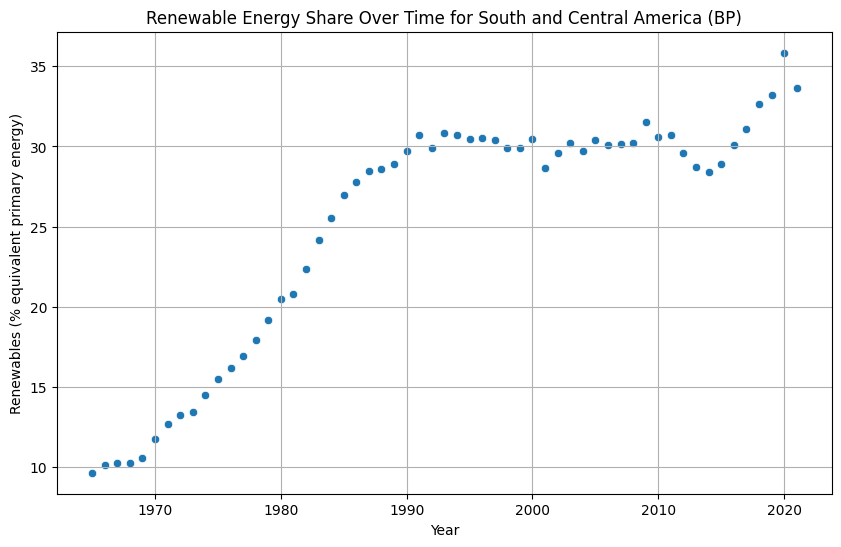

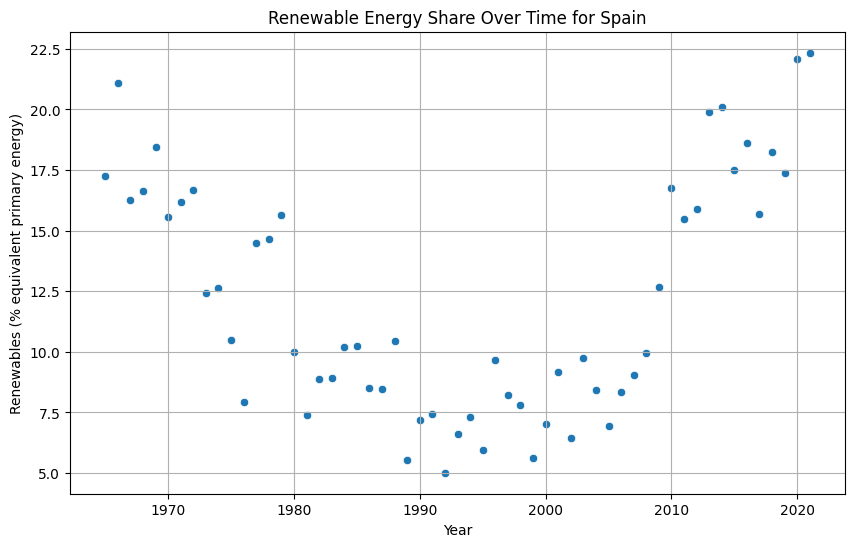

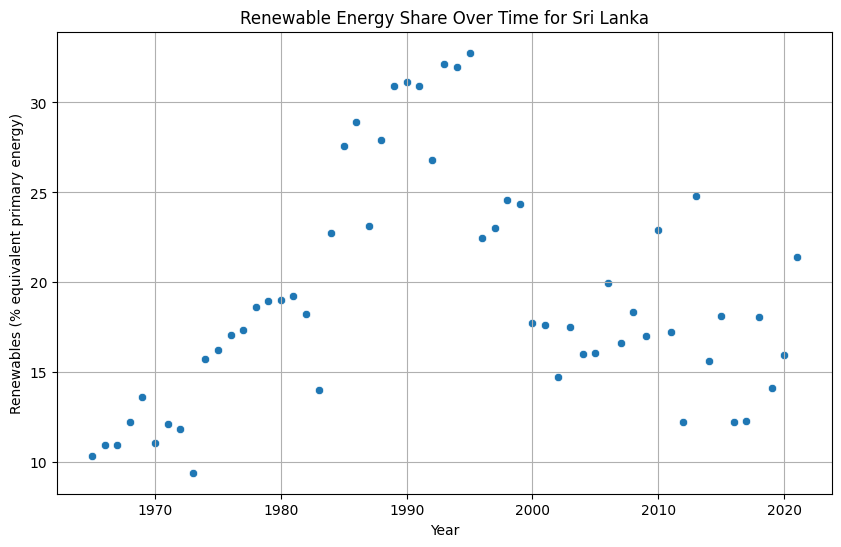

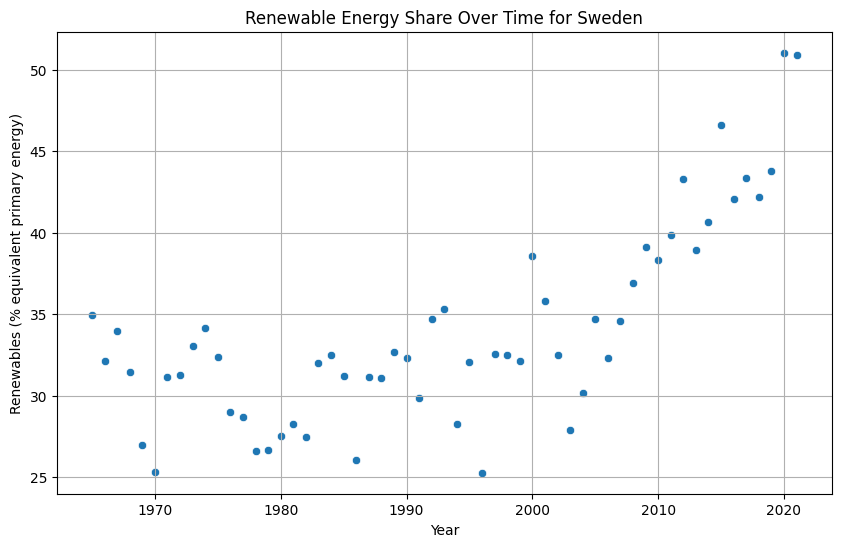

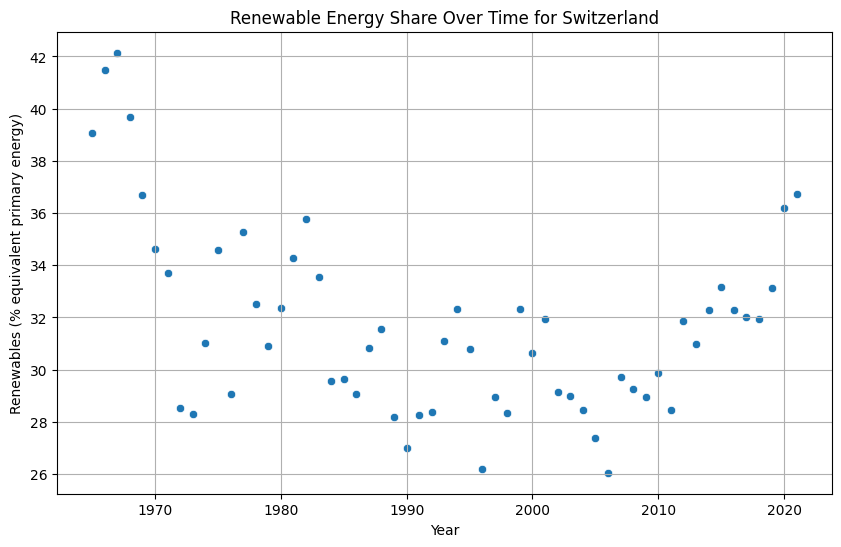

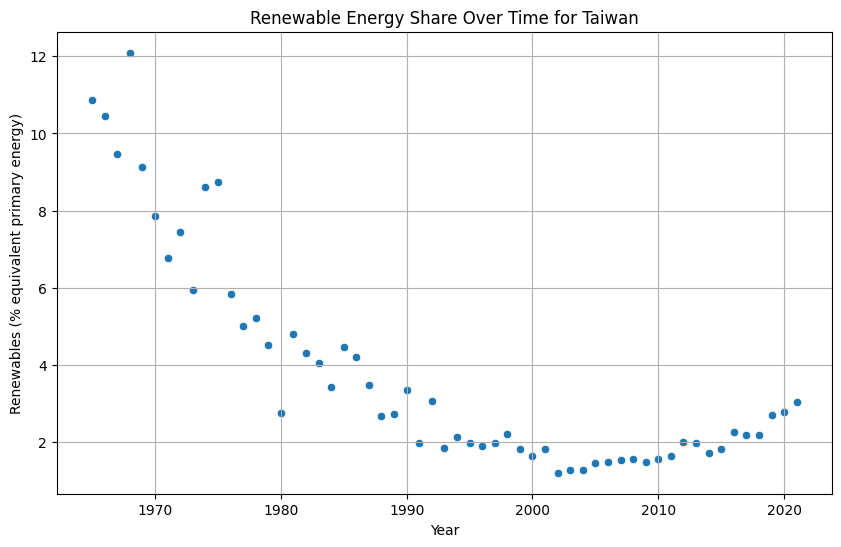

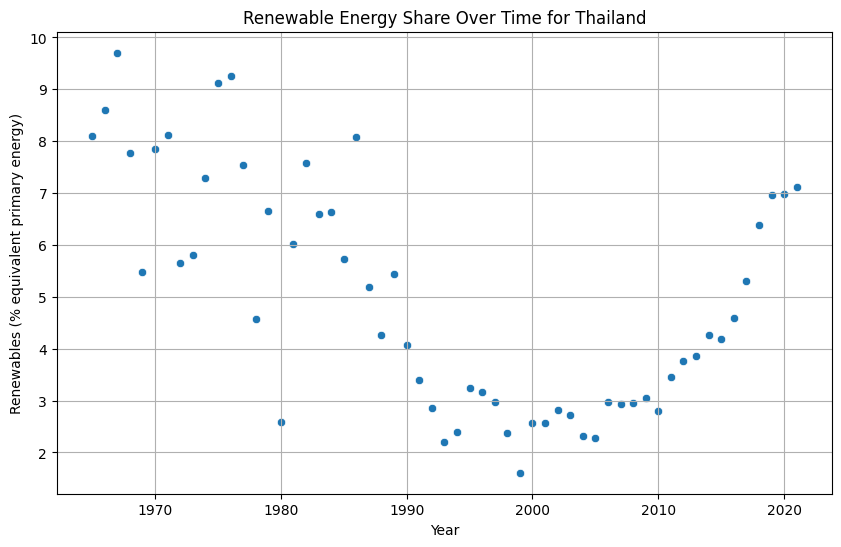

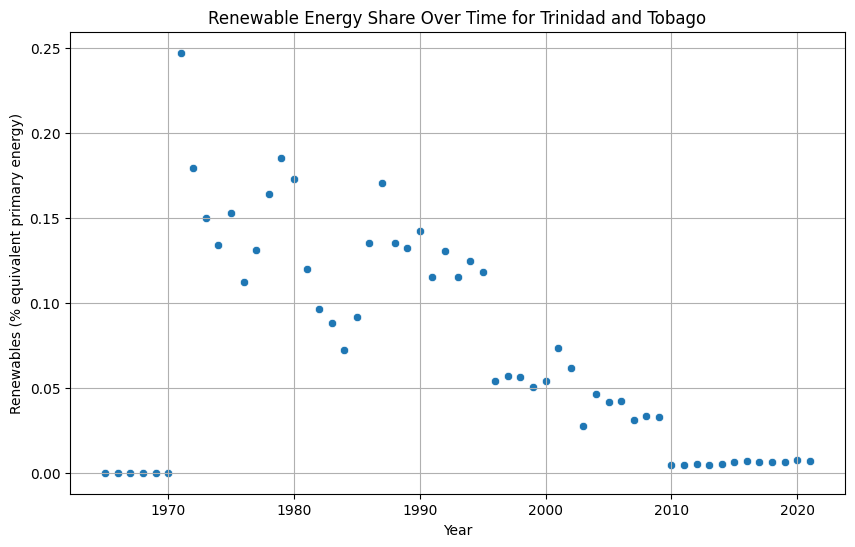

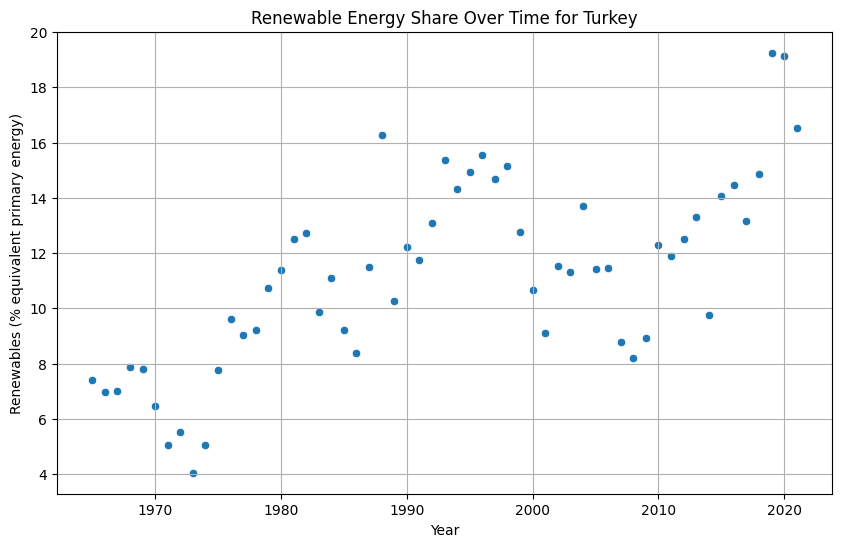

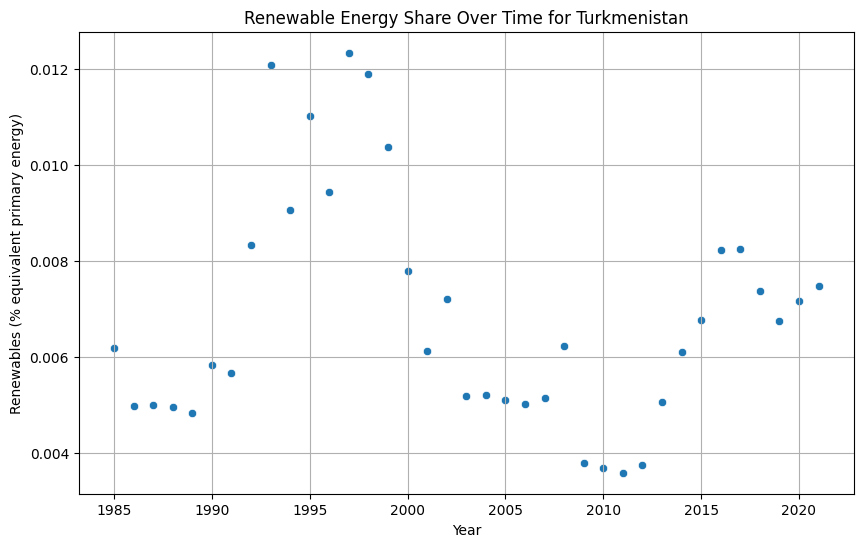

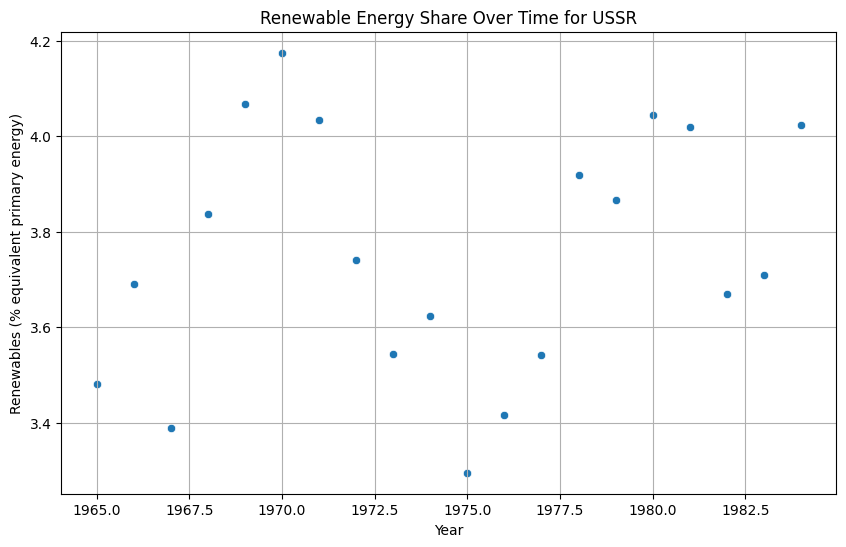

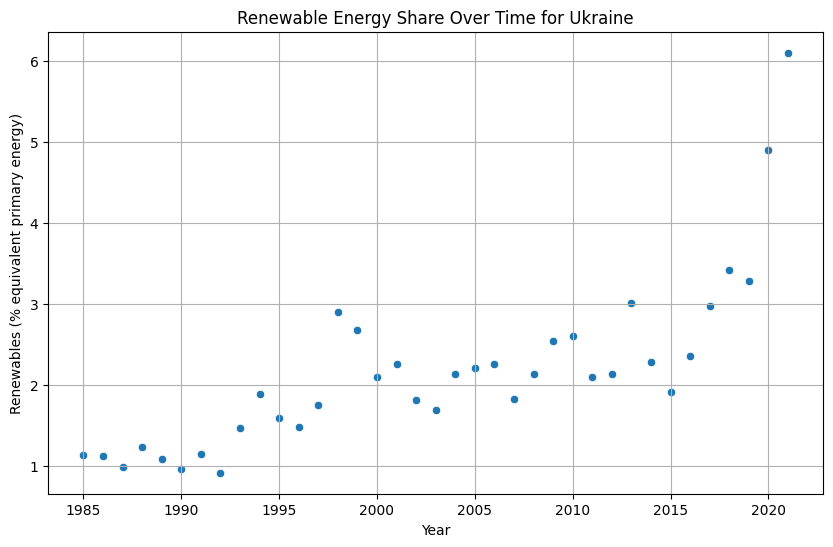

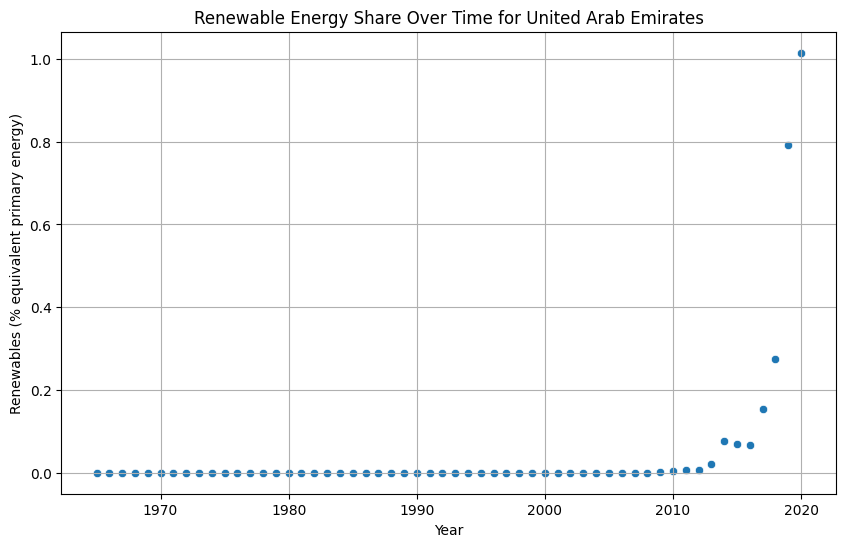

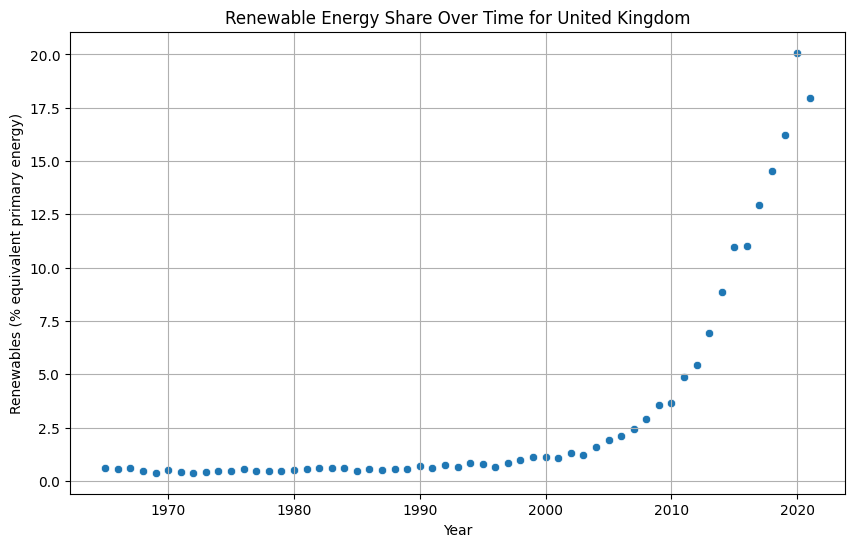

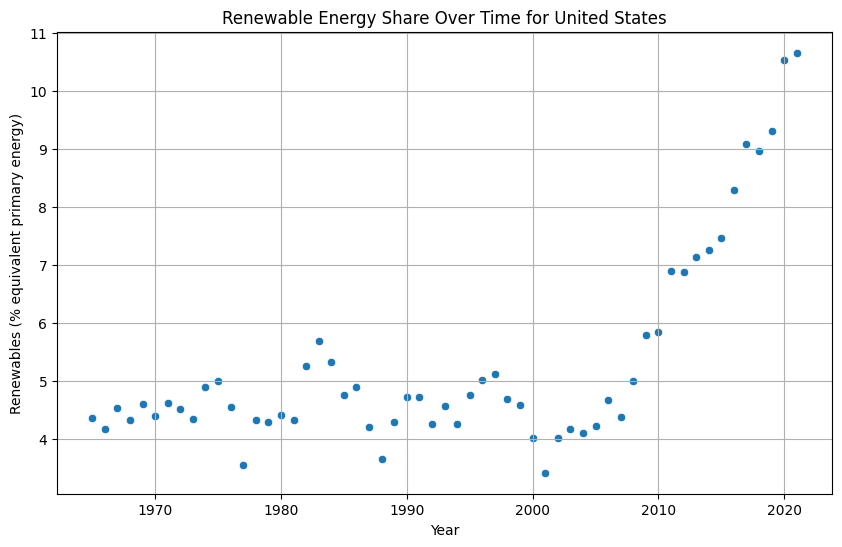

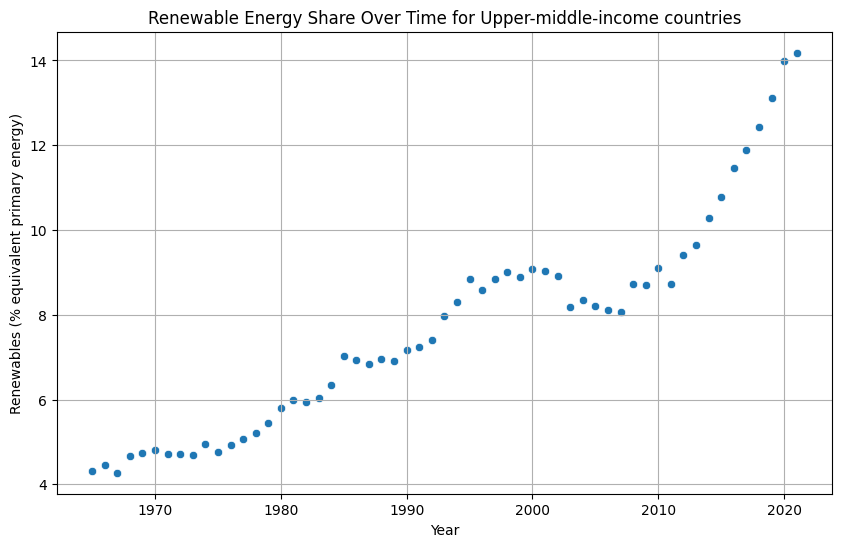

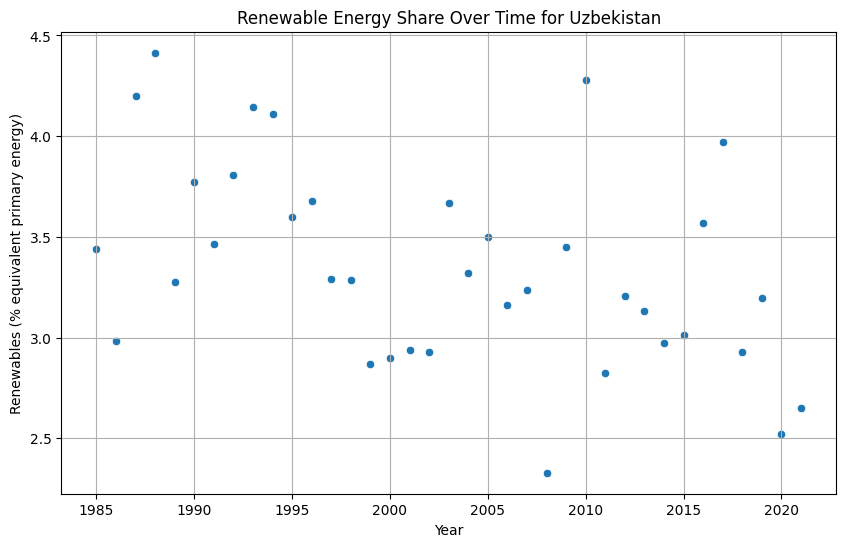

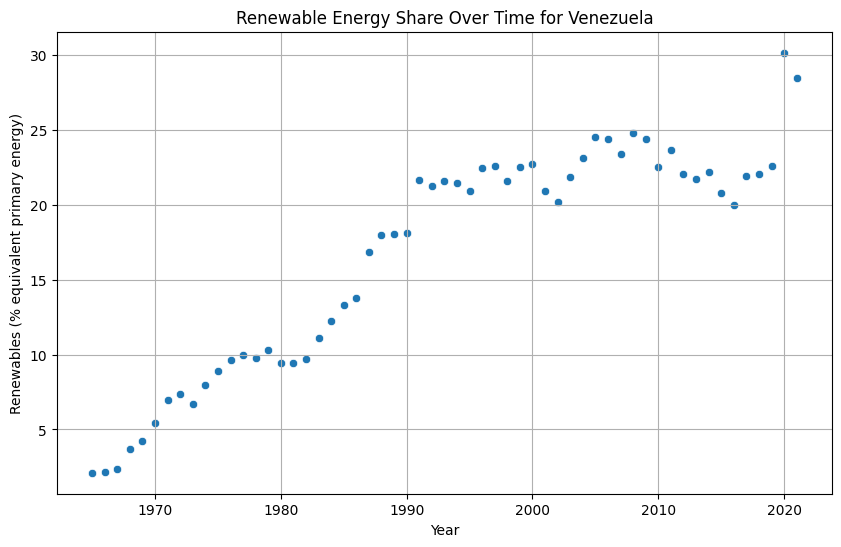

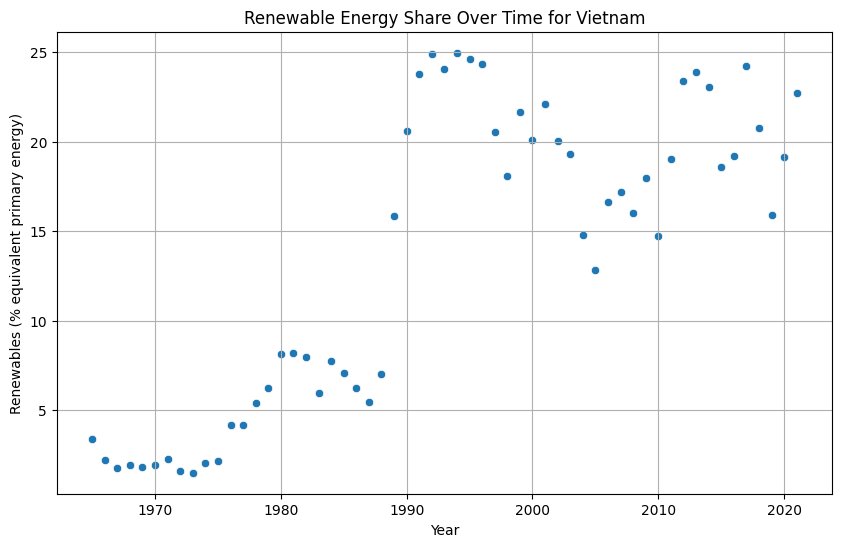

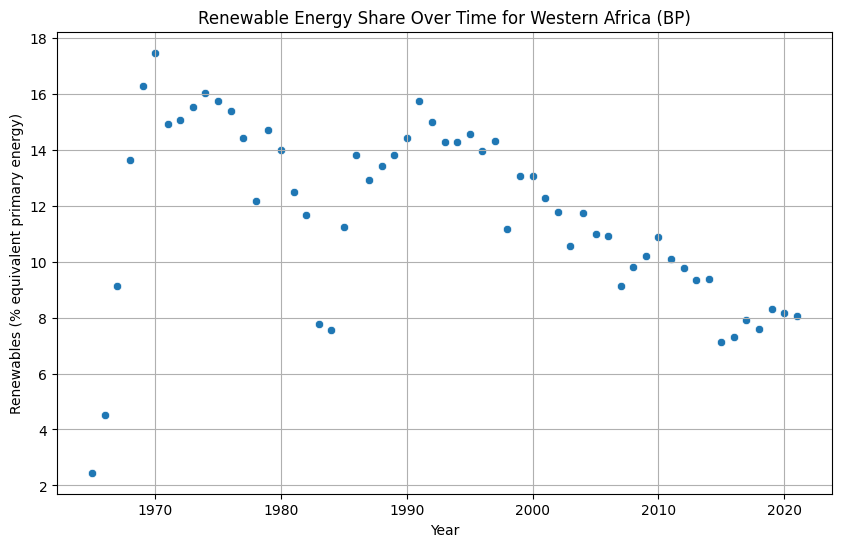

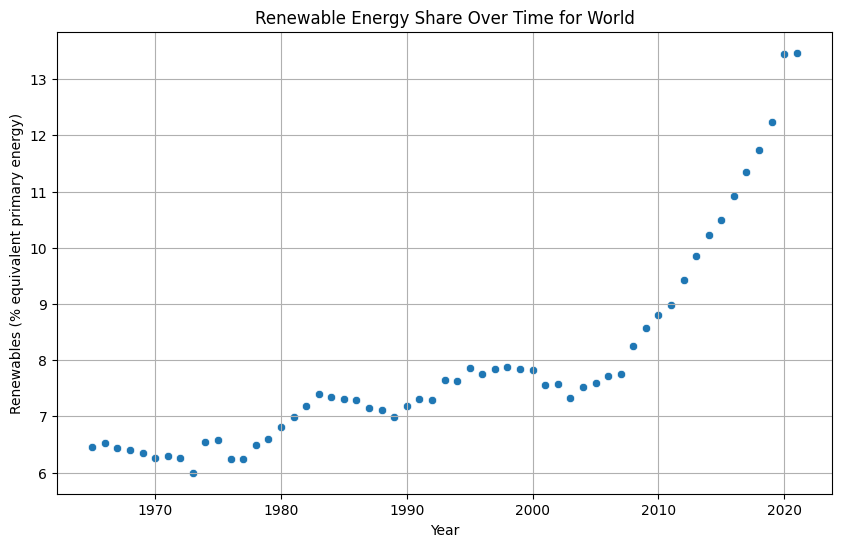

In [10]:
# First trying with Linear Regression, plotting scatter plot
# Draw scatter plot for each entity with Year as X and Renewables as Y

# Get unique entities
unique_entities = data['Entity'].unique()

# Loop through each entity and create a scatter plot
for entity in unique_entities:
    plt.figure(figsize=(10, 6)) # Create a new figure for each entity
    entity_data = data[data['Entity'] == entity]
    sns.scatterplot(x=entity_data['Year'], y=entity_data['Renewables (% equivalent primary energy)'])
    plt.title(f'Renewable Energy Share Over Time for {entity}')
    plt.xlabel('Year')
    plt.ylabel('Renewables (% equivalent primary energy)')
    plt.grid(True)
    plt.show() # Display each plot immediately

In [11]:
# Create Independent and dependent variable
X = data['Year'].values.reshape(-1, 1)
y = data['Renewables (% equivalent primary energy)'].values

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (5603, 1)
Shape of y: (5603,)


In [12]:
# Split dataset --Training data & test data
# random state is  psuedonumber generator

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)






In [13]:
print(X_train.shape)

print(X_test.shape)






(4482, 1)
(1121, 1)


In [14]:
# similarly we can check for y_train and y_test
print(y_train.shape)

print(y_test.shape)

(4482,)
(1121,)


In [15]:
# Applying machine learning algo
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()






In [16]:
# training

lin_reg.fit(X_train,y_train) # fit method to give the training meaning
                            # fit linear model

print('Training Completed')






Training Completed


In [17]:
# preditcion : after training completed training

y_pred=lin_reg.predict(X_test)

y_pred






array([11.20039333, 10.75335123,  8.42873232, ..., 13.07797015,
       10.93216807, 11.20039333])

In [18]:
y_test  # actual value of y_test

array([11.344158  , 61.592953  ,  0.50225776, ..., 14.183052  ,
        2.3939245 ,  0.6672698 ])

In [19]:
# coff m and c

print('y_itercept',lin_reg.intercept_)

print('slope',lin_reg.coef_)






y_itercept -167.6164461534423
slope [0.08940842]


In [20]:
# evaluate

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE',mean_absolute_error(y_test,y_pred))

print('MSE',mean_squared_error(y_test,y_pred))

print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

print('R2-score',r2_score(y_test, y_pred))






MAE 9.213656544657026
MSE 175.2499202747597
RMSE 13.238199283692616
R2-score 0.006548046509063266


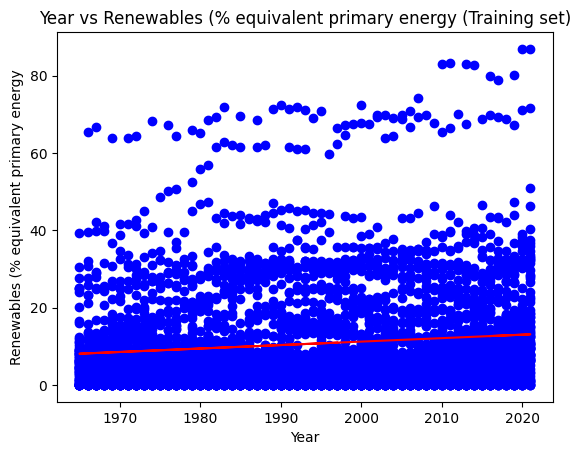

In [22]:
# Visualize the training set results

plt.scatter(X_train, y_train, color='blue')

plt.plot(X_train, lin_reg.predict(X_train), color='red')

plt.title('Year vs Renewables (% equivalent primary energy (Training set)')

plt.xlabel('Year')

plt.ylabel('Renewables (% equivalent primary energy')

plt.show()







In [23]:
y_pred_train=lin_reg.predict(X_train)

print('R2-score on training data',r2_score(y_train, y_pred_train))






R2-score on training data 0.012749701112350187


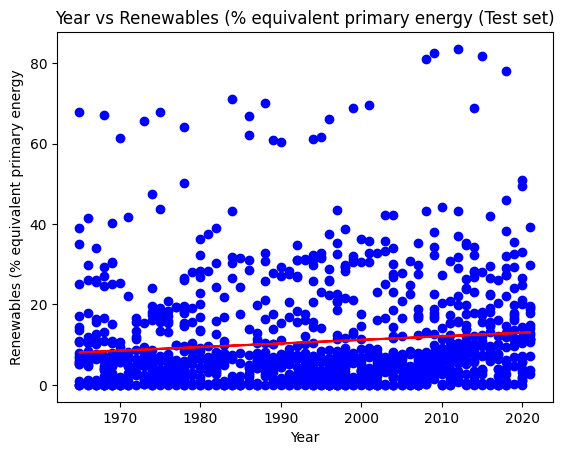

In [24]:
plt.scatter(X_test, y_test, color='blue')

plt.plot(X_test,y_pred ,color='red')

plt.title('Year vs Renewables (% equivalent primary energy (Test set)')

plt.xlabel('Year')

plt.ylabel('Renewables (% equivalent primary energy')

plt.show()






In [26]:
# Our linear regression fails so now we will try different model
# lets take out info of data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5603 non-null   object 
 1   Year                                      5603 non-null   int64  
 2   Renewables (% equivalent primary energy)  5603 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 131.4+ KB


In [27]:
# all the object data need to be converted into dummy type
data['Entity'].value_counts()

Entity
Africa             57
Africa (BP)        57
Algeria            57
Argentina          57
Asia               57
                   ..
Russia             37
Croatia            32
North Macedonia    32
Slovenia           32
USSR               20
Name: count, Length: 104, dtype: int64

In [31]:
dummy_data=pd.get_dummies(data[['Entity']],drop_first=True).astype(int)
dummy_data


Entity_Africa (BP)  Entity_Algeria  Entity_Argentina  Entity_Asia  \
0                      0               0                 0            0   
1                      0               0                 0            0   
2                      0               0                 0            0   
3                      0               0                 0            0   
4                      0               0                 0            0   
...                  ...             ...               ...          ...   
5598                   0               0                 0            0   
5599                   0               0                 0            0   
5600                   0               0                 0            0   
5601                   0               0                 0            0   
5602                   0               0                 0            0   

      Entity_Asia Pacific (BP)  Entity_Australia  Entity_Austria  \
0                            0                 0               0   
1                            0                 0               0   
2                            0                 0               0   
3                            0                 0               0   
4                            0                 0               0   
...                        ...               ...             ...   
5598                         0                 0               0   
5599                         0                 0               0   
5600                         0                 0               0   
5601                         0                 0               0   
5602                         0                 0               0   

      Entity_Azerbaijan  Entity_Bangladesh  Entity_Belarus  ...  \
0                     0                  0               0  ...   
1                     0                  0               0  ...   
2                     0                  0               0  ...   
3                     0                  0               0  ...   
4                     0                  0               0  ...   
...                 ...                ...             ...  ...   
5598                  0                  0               0  ...   
5599                  0                  0               0  ...   
5600                  0                  0               0  ...   
5601                  0                  0               0  ...   
5602                  0                  0               0  ...   

      Entity_Ukraine  Entity_United Arab Emirates  Entity_United Kingdom  \
0                  0                            0                      0   
1                  0                            0                      0   
2                  0                            0                      0   
3                  0                            0                      0   
4                  0                            0                      0   
...              ...                          ...                    ...   
5598               0                            0                      0   
5599               0                            0                      0   
5600               0                            0                      0   
5601               0                            0                      0   
5602               0                            0                      0   

      Entity_United States  Entity_Upper-middle-income countries  \
0                        0                                     0   
1                        0                                     0   
2                        0                                     0   
3                        0                                     0   
4                        0                                     0   
...                    ...                                   ...   
5598                     0                                     0   
5599                     0

In [36]:
#create dep var & indep var
# salary is as outcome variable and other categorical are also dropped
# copy data into data1 fist
data1=data.copy()
y=data1['Renewables (% equivalent primary energy)']

X=data1.drop(['Year'],axis=1)
data1
#data






Entity  Year  Renewables (% equivalent primary energy)
0     Africa  1965                                  5.747495
1     Africa  1966                                  6.122062
2     Africa  1967                                  6.325731
3     Africa  1968                                  7.005293
4     Africa  1969                                  7.956088
...      ...   ...                                       ...
5598   World  2017                                 11.355979
5599   World  2018                                 11.741059
5600   World  2019                                 12.237987
5601   World  2020                                 13.455194
5602   World  2021                                 13.470907

[5603 rows x 3 columns]

In [37]:
# dummy data are concatenated
X=pd.concat([X,dummy_data],axis=1)

X

Entity  Renewables (% equivalent primary energy)  Entity_Africa (BP)  \
0     Africa                                  5.747495                   0   
1     Africa                                  6.122062                   0   
2     Africa                                  6.325731                   0   
3     Africa                                  7.005293                   0   
4     Africa                                  7.956088                   0   
...      ...                                       ...                 ...   
5598   World                                 11.355979                   0   
5599   World                                 11.741059                   0   
5600   World                                 12.237987                   0   
5601   World                                 13.455194                   0   
5602   World                                 13.470907                   0   

      Entity_Algeria  Entity_Argentina  Entity_Asia  Entity_Asia Pacific (BP)  \
0                  0                 0            0                         0   
1                  0                 0            0                         0   
2                  0                 0            0                         0   
3                  0                 0            0                         0   
4                  0                 0            0                         0   
...              ...               ...          ...                       ...   
5598               0                 0            0                         0   
5599               0                 0            0                         0   
5600               0                 0            0                         0   
5601               0                 0            0                         0   
5602               0                 0            0                         0   

      Entity_Australia  Entity_Austria  Entity_Azerbaijan  ...  \
0                    0               0                  0  ...   
1                    0               0                  0  ...   
2                    0               0                  0  ...   
3                    0               0                  0  ...   
4                    0               0                  0  ...   
...                ...             ...                ...  ...   
5598                 0               0                  0  ...   
5599                 0               0                  0  ...   
5600                 0               0                  0  ...   
5601                 0               0                  0  ...   
5602                 0               0                  0  ...   

      Entity_Ukraine  Entity_United Arab Emirates  Entity_United Kingdom  \
0                  0                            0                      0   
1                  0                            0                      0   
2                  0                            0                      0   
3                  0                            0                      0   
4                  0                            0                      0   
...              ...                          ...                    ...   
5598               0                            0                      0   
5599               0                            0                      0   
5600               0                            0                      0   
5601               0                            0                      0   
5602               0                            0                      0   

      Entity_United States  Entity_Upper-middle-income countries  \
0                        0                                     0   
1                        0                                     0   
2                        0                                     0   
3                        0                                     0   
4                        0                        

In [38]:
# split data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)






In [39]:
print (X_train.shape)
print (X_test.shape)

(4202, 105)
(1401, 105)


In [40]:
X_train

Entity  Renewables (% equivalent primary energy)  \
5477         Vietnam                                 14.711740   
1513          Europe                                  5.549151   
4570           Spain                                 12.622826   
4065         Romania                                  6.283785   
2187           India                                  9.310850   
...              ...                                       ...   
3772            Peru                                 24.380442   
5191  United Kingdom                                  0.567624   
5226   United States                                  4.542216   
5390       Venezuela                                  9.454481   
860           Canada                                 29.652600   

      Entity_Africa (BP)  Entity_Algeria  Entity_Argentina  Entity_Asia  \
5477                   0               0                 0            0   
1513                   0               0                 0            0   
4570                   0               0                 0            0   
4065                   0               0                 0            0   
2187                   0               0                 0            0   
...                  ...             ...               ...          ...   
3772                   0               0                 0            0   
5191                   0               0                 0            0   
5226                   0               0                 0            0   
5390                   0               0                 0            0   
860                    0               0                 0            0   

      Entity_Asia Pacific (BP)  Entity_Australia  Entity_Austria  \
5477                         0                 0               0   
1513                         0                 0               0   
4570                         0                 0               0   
4065                         0                 0               0   
2187                         0                 0               0   
...                        ...               ...             ...   
3772                         0                 0               0   
5191                         0                 0               0   
5226                         0                 0               0   
5390                         0                 0               0   
860                          0                 0               0   

      Entity_Azerbaijan  ...  Entity_Ukraine  Entity_United Arab Emirates  \
5477                  0  ...               0                            0   
1513                  0  ...               0                            0   
4570                  0  ...               0                            0   
4065                  0  ...               0                            0   
2187                  0  ...               0                            0   
...                 ...  ...             ...                          ...   
3772                  0  ...               0                            0   
5191                  0  ...               0                            0   
5226                  0  ...               0                            0   
5390                  0  ...               0                            0   
860                   0  ...               0                            0   

      Entity_United Kingdom  Entity_United States  \
5477                      0                     0   
1513                      0                     0   
4570                      0                     0   
4065                      0                     0   
2187                      0                     0   
...                     ...                   ...   
3772                      0                     0   
5191                      1                     0   
5226                      0                     1   
5390                      0                     

In [42]:
# apply standard scalar
from sklearn.preprocessing import StandardScaler

std=StandardScaler()

# Drop the original 'Entity' column before scaling
X_train = X_train.drop('Entity', axis=1)
X_test = X_test.drop('Entity', axis=1)

X_train=std.fit_transform(X_train)  # z_score=val-mean/std

X_test=std.transform(X_test)  # now just transform

In [43]:
X_train

array([[ 0.315968  , -0.08896947, -0.1028689 , ...,  9.72111105,
        -0.10520615, -0.10404381],
       [-0.39750311, -0.08896947, -0.1028689 , ..., -0.1028689 ,
        -0.10520615, -0.10404381],
       [ 0.15330873, -0.08896947, -0.1028689 , ..., -0.1028689 ,
        -0.10520615, -0.10404381],
       ...,
       [-0.47591097, -0.08896947, -0.1028689 , ..., -0.1028689 ,
        -0.10520615, -0.10404381],
       [-0.09340347, -0.08896947, -0.1028689 , ..., -0.1028689 ,
        -0.10520615, -0.10404381],
       [ 1.47938056, -0.08896947, -0.1028689 , ..., -0.1028689 ,
        -0.10520615, -0.10404381]])

In [44]:
# to Handle overfitting Lasso and Ridge
from sklearn.linear_model import Lasso

lasso_model=Lasso(max_iter=10000) # iterations are increased otherwise warning was displayed

lasso_model.fit(X_train,y_train)






Lasso(max_iter=10000)

In [45]:
# creating prediction using Lasso
y_pred_lasso=lasso_model.predict(X_test)

y_pred_train_lasso=lasso_model.predict(X_train)





print('r2-score test data lasso',r2_score(y_test,y_pred_lasso))

print('r2-score train data lasso',r2_score(y_train,y_pred_train_lasso))







r2-score test data lasso 0.9939328697234525
r2-score train data lasso 0.9939365985039461


In [46]:
# check lasso model coeff
lasso_model.coef_

array([11.84227119, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [47]:
X.columns # check in respect to all values

Index(['Entity', 'Renewables (% equivalent primary energy)',
       'Entity_Africa (BP)', 'Entity_Algeria', 'Entity_Argentina',
       'Entity_Asia', 'Entity_Asia Pacific (BP)', 'Entity_Australia',
       'Entity_Austria', 'Entity_Azerbaijan',
       ...
       'Entity_Ukraine', 'Entity_United Arab Emirates',
       'Entity_United Kingdom', 'Entity_United States',
       'Entity_Upper-middle-income countries', 'Entity_Uzbekistan',
       'Entity_Venezuela', 'Entity_Vietnam', 'Entity_Western Africa (BP)',
       'Entity_World'],
      dtype='object', length=105)